In [5]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt

# File directory and name
SMAP_data_dir = r'C:\Users\shiva\OneDrive - iitgn.ac.in\Desktop\CE Project\IN_Project\SMAP_L2_SM_P_E_0'


h5_files = [f for f in os.listdir(SMAP_data_dir) if f.endswith('.h5')]

# Process each file
for file in h5_files:
    fname = os.path.join(SMAP_data_dir, file)  # Full path to the file
    
    with h5py.File(fname, 'r') as f:
        # Read latitude, longitude, and soil moisture data
        sm_data = f['Soil_Moisture_Retrieval_Data']
        lat = sm_data['latitude'][:]
        lon = sm_data['longitude'][:]
        soil_moisture = sm_data['soil_moisture'][:]
    
    # Replace negative values with NaN
    soil_moisture[soil_moisture < 0] = np.nan

    # Create unique lat/lon grid
    unique_lats = np.unique(lat)
    unique_lons = np.unique(lon)
    print(f"Unique latitudes: {len(unique_lats)}, Unique longitudes: {len(unique_lons)}")
    
    # Create a grid
    lon_grid, lat_grid = np.meshgrid(unique_lons, unique_lats)

    # Initialize soil moisture grid
    soil_moisture_grid = np.full(lat_grid.shape, np.nan)

    # Map soil moisture to the grid
    for i in range(len(lat)):
        # Find the nearest indices in the grid for the current lat/lon
        lat_idx = np.where(unique_lats == lat[i])[0][0]
        lon_idx = np.where(unique_lons == lon[i])[0][0]
        soil_moisture_grid[lat_idx, lon_idx] = soil_moisture[i]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(lon_grid, lat_grid, soil_moisture_grid, cmap='viridis', shading='auto')
    plt.colorbar(label='Soil Moisture (m³/m³)')
    plt.title(f'Soil Moisture from {file}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.clim(0, 0.4)
    plt.show()

Unique latitudes: 1624, Unique longitudes: 3455


KeyboardInterrupt: 

In [9]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Directory containing the .h5 files
SMAP_data_dir = 'IN_Project/SMAP_L2_SM_P_E_0'

# List all .h5 files in the directory
h5_files = [f for f in os.listdir(SMAP_data_dir) if f.endswith('.h5')]

# Process each file
for file in h5_files:
    fname = os.path.join(SMAP_data_dir, file)  # Full path to the file
    
    with h5py.File(fname, 'r') as f:
        # Read latitude, longitude, and soil moisture data
        sm_data = f['Soil_Moisture_Retrieval_Data']
        lat = sm_data['latitude'][:]
        lon = sm_data['longitude'][:]
        soil_moisture = sm_data['soil_moisture'][:]
    
    # Print dimensions and sample data for debugging
    print(f"Processing file: {file}")
    print(f"Latitude dimensions: {lat.shape}, Sample values: {lat[:5]}")
    print(f"Longitude dimensions: {lon.shape}, Sample values: {lon[:5]}")
    print(f"Soil Moisture dimensions: {soil_moisture.shape}, Sample values: {soil_moisture[:5]}")
    
    # Optional: Check for unique lat/lon values if assuming a grid
    unique_lats = np.unique(lat)
    unique_lons = np.unique(lon)
    print(f"Unique latitudes: {len(unique_lats)}, Sample: {unique_lats[:]}")
    print(f"Unique longitudes: {len(unique_lons)}, Sample: {unique_lons[:]}")
    
    # Reshape soil moisture data to match the grid dimensions if possible
    nrows = len(unique_lats)
    ncols = len(unique_lons)
    


Processing file: SMAP_L2_SM_P_E_04891_D_20160101T000354_R19240_001.h5
Latitude dimensions: (269070,), Sample values: [82.75034 81.24827 79.57458 79.19619 78.83045]
Longitude dimensions: (269070,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (269070,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3455, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 269070 into shape (1624,3455)
Processing file: SMAP_L2_SM_P_E_04892_D_20160101T014223_R19240_001.h5
Latitude dimensions: (270306,), Sample values: [84.65642  76.245766 75.95551  84.65642  76.845055]
Longitude dimensions: (270306,), Sample values: [-179.95332 -179.95332 -179.95332 -179.85995 -179.85995]
Soil Moisture dimensions: (270306,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitude

Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3457, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 270100 into shape (1624,3457)
Processing file: SMAP_L2_SM_P_E_04942_A_20160104T105603_R19240_001.h5
Latitude dimensions: (268485,), Sample values: [-76.845055 -77.154976 -77.47241  -77.797966 -78.47616 ]
Longitude dimensions: (268485,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (268485,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3448, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 268485 into shape (1624,3448)
Processing file: SMAP_L2_SM_P_E_04943_A_20160104T123432_R19240_001.h5
Latitude dimensions: (268074,), Sa

Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3454, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 268831 into shape (1624,3454)
Processing file: SMAP_L2_SM_P_E_05000_A_20160108T100642_R19240_001.h5
Latitude dimensions: (270519,), Sample values: [-75.67102  -75.95551  -76.845055 -77.154976 -77.797966]
Longitude dimensions: (270519,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (270519,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3450, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 270519 into shape (1624,3450)
Processing file: SMAP_L2_SM_P_E_05001_A_20160108T114508_R19240_001.h5
Latitude dimensions: (267870,), Sa

Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3455, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 269221 into shape (1624,3455)
Processing file: SMAP_L2_SM_P_E_05044_A_20160111T101907_R19240_001.h5
Latitude dimensions: (270243,), Sample values: [-75.95551  -76.245766 -76.54214  -76.845055 -77.154976]
Longitude dimensions: (270243,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (270243,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3448, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 270243 into shape (1624,3448)
Processing file: SMAP_L2_SM_P_E_05045_A_20160111T115737_R19240_001.h5
Latitude dimensions: (267446,), Sa

Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3447, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 267664 into shape (1624,3447)
Processing file: SMAP_L2_SM_P_E_05095_D_20160114T224958_R19240_001.h5
Latitude dimensions: (268726,), Sample values: [83.95421 81.24827 80.80154 79.96706 79.57458]
Longitude dimensions: (268726,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (268726,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3451, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 268726 into shape (1624,3451)
Processing file: SMAP_L2_SM_P_E_05096_D_20160115T002828_R19240_001.h5
Latitude dimensions: (268859,), Sample value

Processing file: SMAP_L2_SM_P_E_05139_D_20160117T230223_R19240_001.h5
Latitude dimensions: (268544,), Sample values: [83.95421 80.80154 79.96706 79.57458 78.83045]
Longitude dimensions: (268544,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (268544,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3454, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 268544 into shape (1624,3454)
Processing file: SMAP_L2_SM_P_E_05140_D_20160118T004053_R19240_001.h5
Latitude dimensions: (268819,), Sample values: [83.95421 82.2176  80.37534 79.96706 79.19619]
Longitude dimensions: (268819,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (268819,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 16

Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3455, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 267965 into shape (1624,3455)
Processing file: SMAP_L2_SM_P_E_05192_A_20160121T131144_R19240_001.h5
Latitude dimensions: (268628,), Sample values: [-76.54214  -77.47241  -77.797966 -78.13229  -78.83045 ]
Longitude dimensions: (268628,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (268628,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3451, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 268628 into shape (1624,3451)
Processing file: SMAP_L2_SM_P_E_05198_D_20160121T235145_R19240_001.h5
Latitude dimensions: (268902,), Sa

Processing file: SMAP_L2_SM_P_E_05235_A_20160124T114544_R19240_001.h5
Latitude dimensions: (267975,), Sample values: [-77.154976 -77.47241  -78.13229  -79.19619  -77.154976]
Longitude dimensions: (267975,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.85995]
Soil Moisture dimensions: (267975,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3448, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 267975 into shape (1624,3448)
Processing file: SMAP_L2_SM_P_E_05236_A_20160124T132409_R19240_001.h5
Latitude dimensions: (268500,), Sample values: [-77.154976 -82.75034  -83.32521  -76.245766 -76.54214 ]
Longitude dimensions: (268500,), Sample values: [-179.95332 -179.95332 -179.95332 -179.85995 -179.85995]
Soil Moisture dimensions: (268500,), Sample values: [-9999. -9999. -9999. -9999. -9999.]


Processing file: SMAP_L2_SM_P_E_05293_A_20160128T105635_R19240_001.h5
Latitude dimensions: (268449,), Sample values: [-76.845055 -77.154976 -77.47241  -78.83045  -79.57458 ]
Longitude dimensions: (268449,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (268449,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3450, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 268449 into shape (1624,3450)
Processing file: SMAP_L2_SM_P_E_05294_A_20160128T123501_R19240_001.h5
Latitude dimensions: (268010,), Sample values: [-77.154976 -77.797966 -79.19619  -79.96706  -80.80154 ]
Longitude dimensions: (268010,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (268010,), Sample values: [-9999. -9999. -9999. -9999. -9999.]


Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3454, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 268478 into shape (1624,3454)
Processing file: SMAP_L2_SM_P_E_05345_D_20160201T010556_R19240_001.h5
Latitude dimensions: (267479,), Sample values: [83.32521 82.2176  81.71884 81.24827 80.37534]
Longitude dimensions: (267479,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (267479,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3451, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 267479 into shape (1624,3451)
Processing file: SMAP_L2_SM_P_E_05351_A_20160201T100727_R19240_001.h5
Latitude dimensions: (270246,), Sample value

Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3451, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 269947 into shape (1624,3451)
Processing file: SMAP_L2_SM_P_E_05396_A_20160204T115818_R19240_001.h5
Latitude dimensions: (267707,), Sample values: [-77.47241  -77.797966 -78.47616  -78.83045  -79.19619 ]
Longitude dimensions: (267707,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (267707,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3451, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 267707 into shape (1624,3451)
Processing file: SMAP_L2_SM_P_E_05403_D_20160205T001648_R19240_001.h5
Latitude dimensions: (267113,), Sa

Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3454, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 266793 into shape (1624,3454)
Processing file: SMAP_L2_SM_P_E_05448_D_20160208T020739_R19240_001.h5
Latitude dimensions: (269303,), Sample values: [84.65642 84.65642 83.95421 84.65642 83.95421]
Longitude dimensions: (269303,), Sample values: [-179.95332 -179.85995 -179.85995 -179.7666  -179.7666 ]
Soil Moisture dimensions: (269303,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3455, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 269303 into shape (1624,3455)
Processing file: SMAP_L2_SM_P_E_05454_A_20160208T110910_R19240_001.h5
Latitude dimensions: (268103,), Sample value

Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3451, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 268358 into shape (1624,3451)
Processing file: SMAP_L2_SM_P_E_05505_D_20160211T234001_R19240_001.h5
Latitude dimensions: (266664,), Sample values: [83.95421 82.2176  80.80154 79.57458 79.19619]
Longitude dimensions: (266664,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (266664,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3454, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 266664 into shape (1624,3454)
Processing file: SMAP_L2_SM_P_E_05506_D_20160212T011830_R19240_001.h5
Latitude dimensions: (268467,), Sample value

Processing file: SMAP_L2_SM_P_E_05557_A_20160215T121052_R19240_001.h5
Latitude dimensions: (267671,), Sample values: [-77.154976 -77.47241  -77.797966 -78.47616  -78.83045 ]
Longitude dimensions: (267671,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (267671,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3450, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 267671 into shape (1624,3450)
Processing file: SMAP_L2_SM_P_E_05563_D_20160215T225053_R19240_001.h5
Latitude dimensions: (267655,), Sample values: [83.95421  81.24827  79.19619  78.47616  77.797966]
Longitude dimensions: (267655,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (267655,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Uniqu

Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3457, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 267604 into shape (1624,3457)
Processing file: SMAP_L2_SM_P_E_05608_D_20160219T004139_R19240_001.h5
Latitude dimensions: (268340,), Sample values: [83.95421 83.32521 82.75034 82.2176  80.80154]
Longitude dimensions: (268340,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (268340,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3454, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 268340 into shape (1624,3454)
Processing file: SMAP_L2_SM_P_E_05615_A_20160219T112139_R19240_001.h5
Latitude dimensions: (268037,), Sample value

Processing file: SMAP_L2_SM_P_E_05667_D_20160223T013056_R19240_001.h5
Latitude dimensions: (269447,), Sample values: [83.95421  82.75034  76.845055 76.54214  76.245766]
Longitude dimensions: (269447,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (269447,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3457, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 269447 into shape (1624,3457)
Processing file: SMAP_L2_SM_P_E_05673_A_20160223T103231_R19240_001.h5
Latitude dimensions: (269950,), Sample values: [-76.54214  -77.154976 -77.797966 -78.47616  -81.24827 ]
Longitude dimensions: (269950,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (269950,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Uniqu

Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3454, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 268318 into shape (1624,3454)
Processing file: SMAP_L2_SM_P_E_05725_D_20160227T004144_R19240_001.h5
Latitude dimensions: (268297,), Sample values: [83.32521 81.24827 80.80154 79.96706 79.57458]
Longitude dimensions: (268297,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (268297,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3454, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 268297 into shape (1624,3454)
Processing file: SMAP_L2_SM_P_E_05732_A_20160227T112144_R19240_001.h5
Latitude dimensions: (267906,), Sample value

Processing file: SMAP_L2_SM_P_E_05775_A_20160301T095539_R19240_001.h5
Latitude dimensions: (270578,), Sample values: [-75.391945 -75.67102  -76.245766 -76.845055 -77.47241 ]
Longitude dimensions: (270578,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (270578,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3448, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 270578 into shape (1624,3448)
Processing file: SMAP_L2_SM_P_E_05776_A_20160301T113405_R19240_001.h5
Latitude dimensions: (267906,), Sample values: [-77.47241  -77.797966 -78.83045  -79.96706  -82.2176  ]
Longitude dimensions: (267906,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (267906,), Sample values: [-9999. -9999. -9999. -9999. -9999.]


Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3451, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 267858 into shape (1624,3451)
Processing file: SMAP_L2_SM_P_E_05821_A_20160304T132455_R19240_001.h5
Latitude dimensions: (269015,), Sample values: [-76.54214  -76.845055 -77.154976 -83.32521  -83.95421 ]
Longitude dimensions: (269015,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (269015,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3448, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 269015 into shape (1624,3448)
Processing file: SMAP_L2_SM_P_E_05827_D_20160305T000456_R19240_001.h5
Latitude dimensions: (268817,), Sa

Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3448, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 268501 into shape (1624,3448)
Processing file: SMAP_L2_SM_P_E_05879_A_20160308T123543_R19240_001.h5
Latitude dimensions: (267913,), Sample values: [-77.154976 -77.797966 -78.47616  -80.37534  -81.24827 ]
Longitude dimensions: (267913,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (267913,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3450, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 267913 into shape (1624,3450)
Processing file: SMAP_L2_SM_P_E_05885_D_20160308T231543_R19240_001.h5
Latitude dimensions: (267286,), Sa

Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3457, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 268158 into shape (1624,3457)
Processing file: SMAP_L2_SM_P_E_05930_D_20160312T010629_R19240_001.h5
Latitude dimensions: (268836,), Sample values: [83.95421 82.2176  81.71884 81.24827 79.96706]
Longitude dimensions: (268836,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (268836,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3454, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 268836 into shape (1624,3454)
Processing file: SMAP_L2_SM_P_E_05936_A_20160312T100800_R19240_001.h5
Latitude dimensions: (270282,), Sample value

Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3454, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 267725 into shape (1624,3454)
Processing file: SMAP_L2_SM_P_E_05988_D_20160316T001717_R19240_001.h5
Latitude dimensions: (260794,), Sample values: [79.96706  78.83045  78.47616  78.13229  77.797966]
Longitude dimensions: (260794,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (260794,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3445, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 260794 into shape (1624,3445)
Processing file: SMAP_L2_SM_P_E_05989_D_20160316T015542_R19240_001.h5
Latitude dimensions: (269812,), Sample 

Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3448, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 269328 into shape (1624,3448)
Processing file: SMAP_L2_SM_P_E_06039_A_20160319T110934_R19240_001.h5
Latitude dimensions: (268171,), Sample values: [-77.154976 -77.47241  -77.797966 -78.83045  -81.71884 ]
Longitude dimensions: (268171,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (268171,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3448, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 268171 into shape (1624,3448)
Processing file: SMAP_L2_SM_P_E_06040_A_20160319T124800_R19240_001.h5
Latitude dimensions: (267950,), Sa

Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3454, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 269412 into shape (1624,3454)
Processing file: SMAP_L2_SM_P_E_06097_A_20160323T102017_R19240_001.h5
Latitude dimensions: (269887,), Sample values: [-76.845055 -77.154976 -80.37534  -80.80154  -84.65642 ]
Longitude dimensions: (269887,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (269887,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3448, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 269887 into shape (1624,3448)
Processing file: SMAP_L2_SM_P_E_06098_A_20160323T115847_R19240_001.h5
Latitude dimensions: (267473,), Sa

Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3455, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 269964 into shape (1624,3455)
Processing file: SMAP_L2_SM_P_E_06156_A_20160327T110931_R19240_001.h5
Latitude dimensions: (268060,), Sample values: [-76.845055 -77.154976 -77.797966 -78.47616  -78.83045 ]
Longitude dimensions: (268060,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (268060,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3453, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 268060 into shape (1624,3453)
Processing file: SMAP_L2_SM_P_E_06157_A_20160327T124800_R19240_001.h5
Latitude dimensions: (268095,), Sa

Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3455, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 268754 into shape (1624,3455)
Processing file: SMAP_L2_SM_P_E_06214_A_20160331T102018_R19240_001.h5
Latitude dimensions: (270522,), Sample values: [-75.95551  -76.245766 -76.54214  -76.845055 -77.47241 ]
Longitude dimensions: (270522,), Sample values: [-179.95332 -179.95332 -179.95332 -179.95332 -179.95332]
Soil Moisture dimensions: (270522,), Sample values: [-9999. -9999. -9999. -9999. -9999.]
Unique latitudes: 1624, Sample: [-84.65642 -83.95421 -83.32521 -82.75034 -82.2176 ]
Unique longitudes: 3450, Sample: [-179.95332 -179.85995 -179.7666  -179.67323 -179.57988]
Error reshaping soil moisture: cannot reshape array of size 270522 into shape (1624,3450)
Processing file: SMAP_L2_SM_P_E_06215_A_20160331T115844_R19240_001.h5
Latitude dimensions: (268086,), Sa

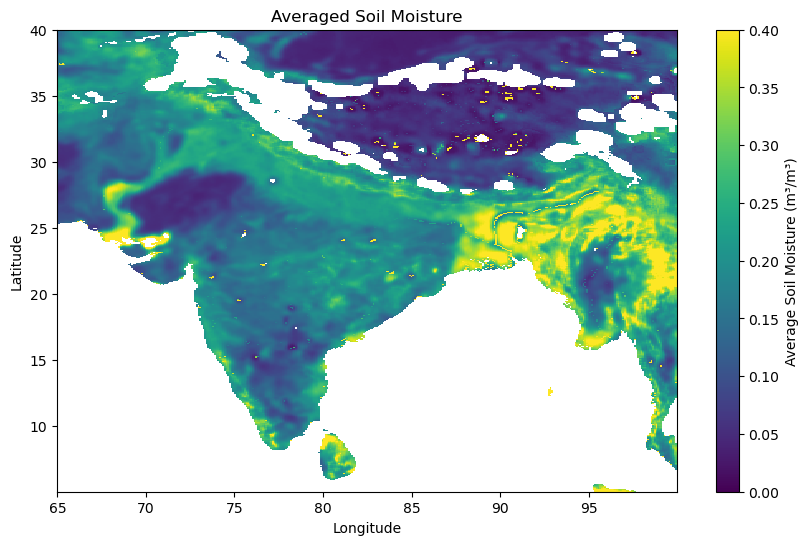

Averaged soil moisture data saved to IN_Project/SMAP_L2_SM_P_E_0\averaged_soil_moisture.csv


In [1]:
import os
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt

# File directory and name
SMAP_data_dir = 'IN_Project/SMAP_L2_SM_P_E_0'

# List all .h5 files
h5_files = [f for f in os.listdir(SMAP_data_dir) if f.endswith('.h5')]

# Initialize dictionaries to hold accumulated soil moisture and counts for averaging
soil_moisture_accumulated = {}
soil_moisture_counts = {}

# Initialize lists to store latitudes and longitudes
all_latitudes = []
all_longitudes = []

# Define the extent for latitude and longitude (masking)
lat_min, lat_max = 5, 40
lon_min, lon_max = 65, 100

# Step 1: Read file and apply the latitude, longitude extent
for file in h5_files:
    fname = os.path.join(SMAP_data_dir, file)  # Full path to the file

    with h5py.File(fname, 'r') as f:
        # Read latitude, longitude, and soil moisture data
        sm_data = f['Soil_Moisture_Retrieval_Data']
        lat = sm_data['latitude'][:]
        lon = sm_data['longitude'][:]
        soil_moisture = sm_data['soil_moisture'][:]
        soil_moisture[soil_moisture < 0] = np.nan
        # Apply the mask for the desired extent
        mask = (lon >= lon_min) & (lon <= lon_max) & (lat >= lat_min) & (lat <= lat_max)
        lat = lat[mask]
        lon = lon[mask]
        soil_moisture = soil_moisture[mask]

        # Collect all latitudes and longitudes after masking
        all_latitudes.extend(lat)
        all_longitudes.extend(lon)
          # Replace negative values with NaN
        
        # Process each data point to accumulate soil moisture values
        for i in range(len(lat)):
            key = (lat[i], lon[i])  # Use (lat, lon) tuple as key
            if key not in soil_moisture_accumulated:
                soil_moisture_accumulated[key] = 0
                soil_moisture_counts[key] = 0

            # Accumulate values and count valid entries
            if not np.isnan(soil_moisture[i]):
                soil_moisture_accumulated[key] += soil_moisture[i]
                soil_moisture_counts[key] += 1

# Step 2: Create meshgrid using unique latitudes and longitudes
unique_lats = np.unique(all_latitudes)
unique_lons = np.unique(all_longitudes)
lon_grid, lat_grid = np.meshgrid(unique_lons, unique_lats)

# Initialize soil moisture grid (fill with NaN initially)
soil_moisture_grid = np.full(lon_grid.shape, np.nan)

# Step 3: Calculate average soil moisture for each (lat, lon)
averaged_soil_moisture = {
    key: soil_moisture_accumulated[key] / soil_moisture_counts[key]
    for key in soil_moisture_accumulated if soil_moisture_counts[key] >0
}
# Prepare data for saving to CSV
lat_lon = list(averaged_soil_moisture.keys())
average_values = list(averaged_soil_moisture.values())
latitudes, longitudes = zip(*lat_lon)



# Map soil moisture to the grid
for i, (lat, lon) in enumerate(lat_lon):
    lat_idx = np.where(unique_lats == lat)[0][0]
    lon_idx = np.where(unique_lons == lon)[0][0]
    soil_moisture_grid[lat_idx, lon_idx] = average_values[i]


output_df = pd.DataFrame({
    'Latitude': latitudes,
    'Longitude': longitudes,
    'Average_Soil_Moisture': average_values
})

# Save to CSV
output_csv_path = os.path.join(SMAP_data_dir, 'averaged_soil_moisture.csv')
output_df.to_csv(output_csv_path, index=False)

# Step 6: Plotting the averaged soil moisture
plt.figure(figsize=(10, 6))
plt.pcolormesh(lon_grid, lat_grid, soil_moisture_grid, cmap='viridis', shading='auto')
plt.colorbar(label='Average Soil Moisture (m³/m³)')
plt.title('Averaged Soil Moisture')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.clim(0, 0.4)
plt.show()

print(f"Averaged soil moisture data saved to {output_csv_path}")

In [15]:
import pandas as pd

# Load the CSV file
csv_file_path = "India_SMAP_lalos.csv"  # Replace with your actual file path
df = pd.read_csv(csv_file_path)

# Print the column names to verify
print("Columns in the CSV file:", df.columns)

# Specify the column names you want to analyze
column_1 = 'Latitude'  # Replace with the actual column name
column_2 = 'Longitude'  # Replace with the actual column name

# Get the max and min values for each column
max_column_1 = df[column_1].max()
min_column_1 = df[column_1].min()

max_column_2 = df[column_2].max()
min_column_2 = df[column_2].min()

# Print the results
print(f"Max value of {column_1}: {max_column_1}")
print(f"Min value of {column_1}: {min_column_1}")

print(f"Max value of {column_2}: {max_column_2}")
print(f"Min value of {column_2}: {min_column_2}")


Columns in the CSV file: Index(['Latitude', 'Longitude'], dtype='object')
Max value of Latitude: 37.033
Min value of Latitude: 6.8297
Max value of Longitude: 97.702
Min value of Longitude: 66.24


In [31]:
import pandas as pd

# Load the CSV file
csv_file_path = "averaged_soil_moisture.csv"  # Replace with your actual file path
df = pd.read_csv(csv_file_path)

# Print the column names to verify
print("Columns in the CSV file:", df.columns)

# Specify the column name you want to analyze
column_name = 'Average_Soil_Moisture'  # Replace with the actual column name

# Find the maximum number in the column
max_value = df[column_name].max()

# Count how many times the maximum number occurs
max_count = ((df[column_name] <= max_value) & (df[column_name] >= 0.4)).sum()
# Print the result
print(f"The maximum value in '{column_name}' is {max_value}, and it occurs {max_count} times.")


Columns in the CSV file: Index(['Latitude', 'Longitude', 'Average_Soil_Moisture'], dtype='object')
The maximum value in 'Average_Soil_Moisture' is 0.685563325881958, and it occurs 2520 times.


In [1]:
import os
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree  # Efficient nearest neighbor search
import re  # To extract date from filenames

# File paths
SMAP_data_dir = r'IN_Project/SMAP_L2_SM_P_E_0'
grid_file = r'India_SMAP_lalos.csv'

# Load India_SMAP_lalos.csv grid
grid_df = pd.read_csv(grid_file)
grid_lats = grid_df['Latitude'].values
grid_lons = grid_df['Longitude'].values

# Create a KDTree for fast nearest-neighbor lookup
grid_coords = np.column_stack((grid_lats, grid_lons))
tree = cKDTree(grid_coords)

# Define extent for latitude and longitude filtering
lat_min, lat_max = 5, 40
lon_min, lon_max = 65, 100

# List all .h5 files
h5_files = [f for f in os.listdir(SMAP_data_dir) if f.endswith('.h5')]

# Extract unique dates from filenames
date_pattern = re.compile(r'_(\d{8})T')  # Extracts "YYYYMMDD" from filenames
file_groups = {}

for file in h5_files:
    match = date_pattern.search(file)
    if match:
        date_str = match.group(1)  # Extract date (YYYYMMDD)
        if date_str not in file_groups:
            file_groups[date_str] = []
        file_groups[date_str].append(file)

# Process each group of files for a specific date
for date_str, files in file_groups.items():
    print(f"Processing files for date: {date_str}")

    # Dictionary to store accumulated soil moisture and counts for averaging
    soil_moisture_accumulated = {tuple(coord): 0 for coord in grid_coords}
    soil_moisture_counts = {tuple(coord): 0 for coord in grid_coords}

    # Read and process data for each file on this date
    for file in files:
        fname = os.path.join(SMAP_data_dir, file)

        with h5py.File(fname, 'r') as f:
            sm_data = f['Soil_Moisture_Retrieval_Data']
            lat, lon, soil_moisture = sm_data['latitude'][:], sm_data['longitude'][:], sm_data['soil_moisture'][:]

            # Flatten arrays and apply mask for the desired extent
            lat, lon, soil_moisture = lat.flatten(), lon.flatten(), soil_moisture.flatten()
            mask = (lon >= lon_min) & (lon <= lon_max) & (lat >= lat_min) & (lat <= lat_max)
            lat, lon, soil_moisture = lat[mask], lon[mask], soil_moisture[mask]

            # Replace negative values with NaN
            soil_moisture[soil_moisture < 0] = np.nan

            # Find nearest valid (lat, lon) for each data point
            data_coords = np.column_stack((lat, lon))
            _, indices = tree.query(data_coords)  # Find nearest neighbors in the grid
            matched_coords = grid_coords[indices]

            # Accumulate soil moisture values for the matched coordinates
            for i, key in enumerate(map(tuple, matched_coords)):
                if not np.isnan(soil_moisture[i]):
                    soil_moisture_accumulated[key] += soil_moisture[i]
                    soil_moisture_counts[key] += 1

    # Compute the final average soil moisture values
    averaged_soil_moisture = {
        key: soil_moisture_accumulated[key] / soil_moisture_counts[key]
        if soil_moisture_counts[key] > 0 else np.nan
        for key in soil_moisture_accumulated
    }

    # Convert to DataFrame
    latitudes, longitudes = zip(*averaged_soil_moisture.keys())
    average_values = list(averaged_soil_moisture.values())

    output_df = pd.DataFrame({
        'Latitude': latitudes,
        'Longitude': longitudes,
        'Average_Soil_Moisture': average_values
    })

output_csv_path = os.path.join(r'C:\Users\shiva\OneDrive - iitgn.ac.in\Desktop\CE Project', f"{date_str}.csv")

# Save the DataFrame to the new directory
output_df.to_csv(output_csv_path, index=False)

Processing files for date: 20160101
Processing files for date: 20160102
Processing files for date: 20160103
Processing files for date: 20160104
Processing files for date: 20160105
Processing files for date: 20160106
Processing files for date: 20160107
Processing files for date: 20160108
Processing files for date: 20160109
Processing files for date: 20160110
Processing files for date: 20160111
Processing files for date: 20160112
Processing files for date: 20160113
Processing files for date: 20160114
Processing files for date: 20160115
Processing files for date: 20160116
Processing files for date: 20160117
Processing files for date: 20160118
Processing files for date: 20160119
Processing files for date: 20160120
Processing files for date: 20160121
Processing files for date: 20160122
Processing files for date: 20160123
Processing files for date: 20160124
Processing files for date: 20160125
Processing files for date: 20160126
Processing files for date: 20160127
Processing files for date: 2

Plotting soil moisture for date: 20160101


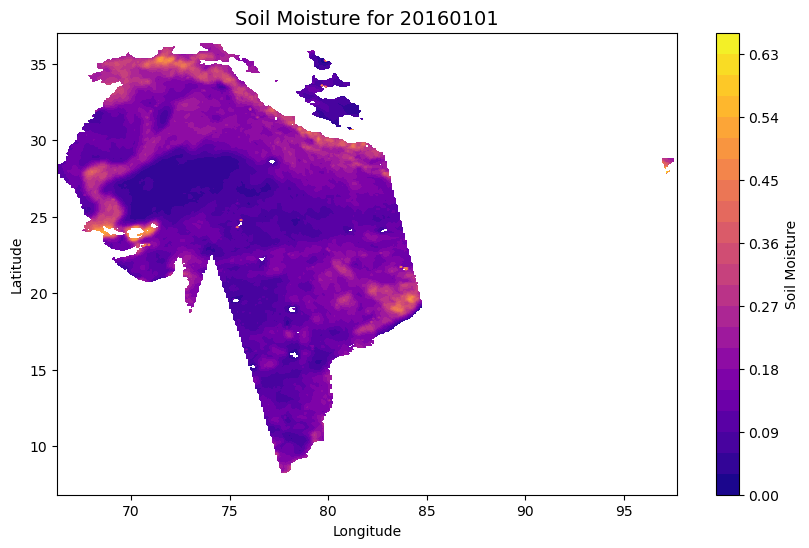

Plotting soil moisture for date: 20160102


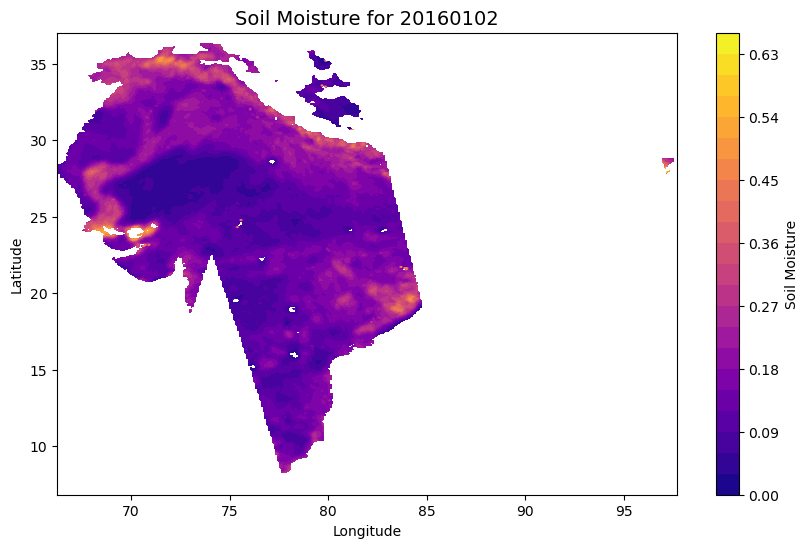

Plotting soil moisture for date: 20160103


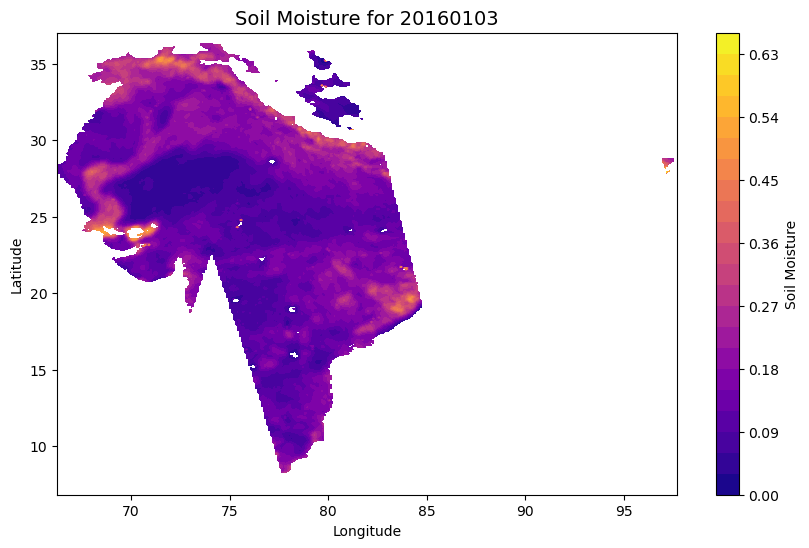

Plotting soil moisture for date: 20160104


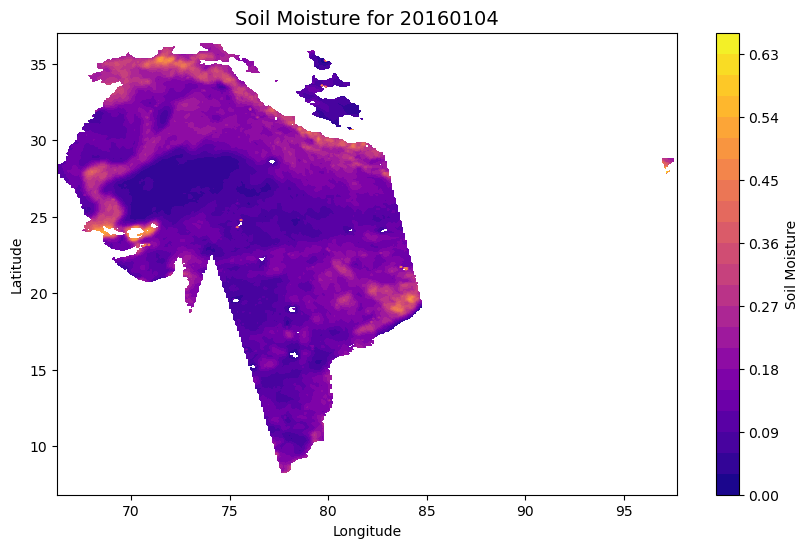

Plotting soil moisture for date: 20160105


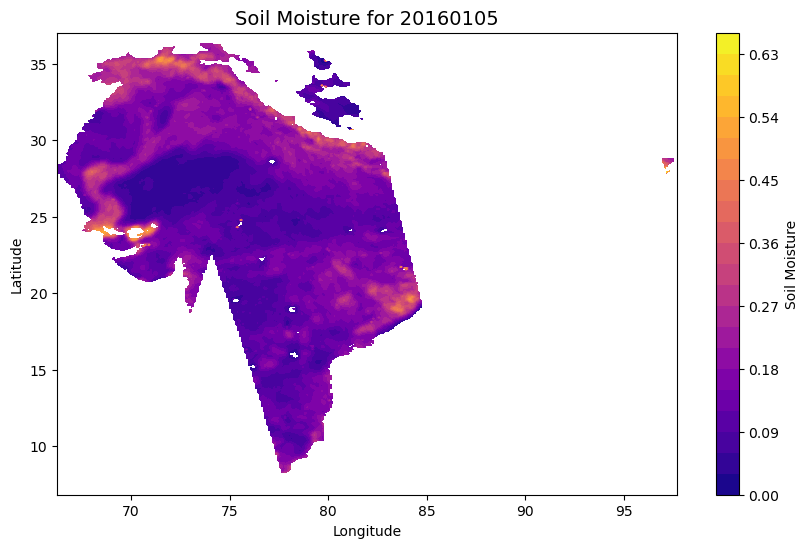

Plotting soil moisture for date: 20160106


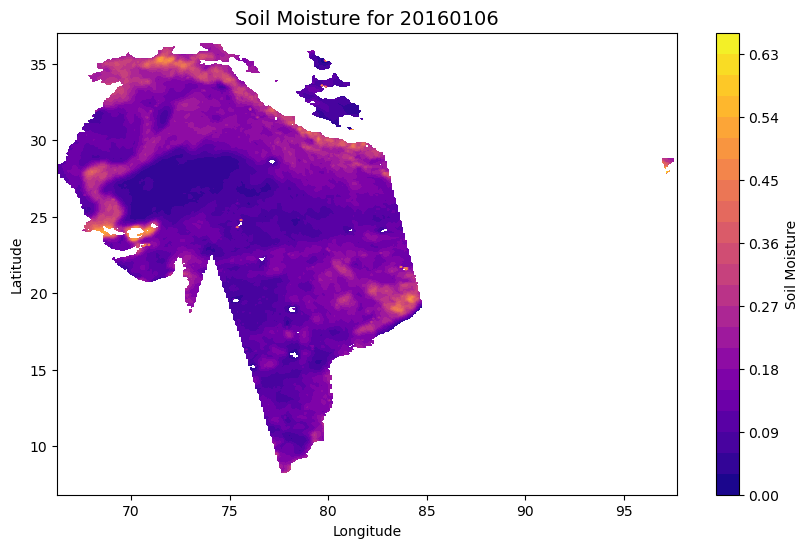

Plotting soil moisture for date: 20160107


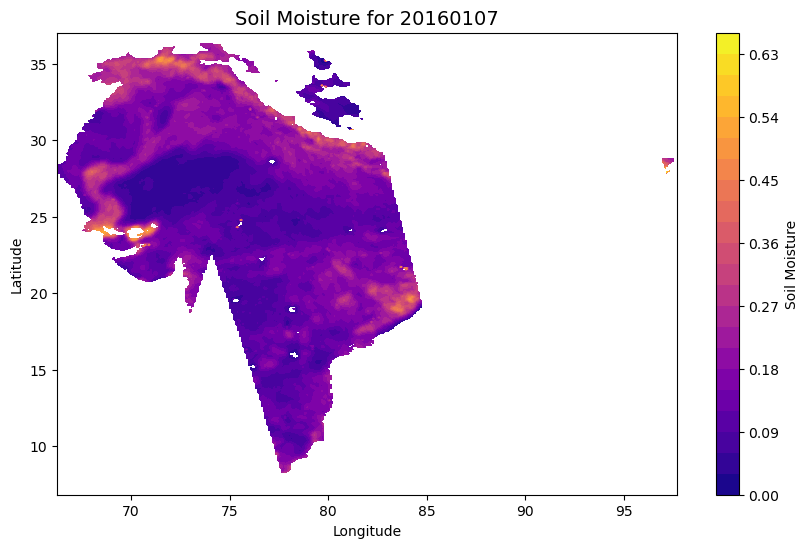

Plotting soil moisture for date: 20160108


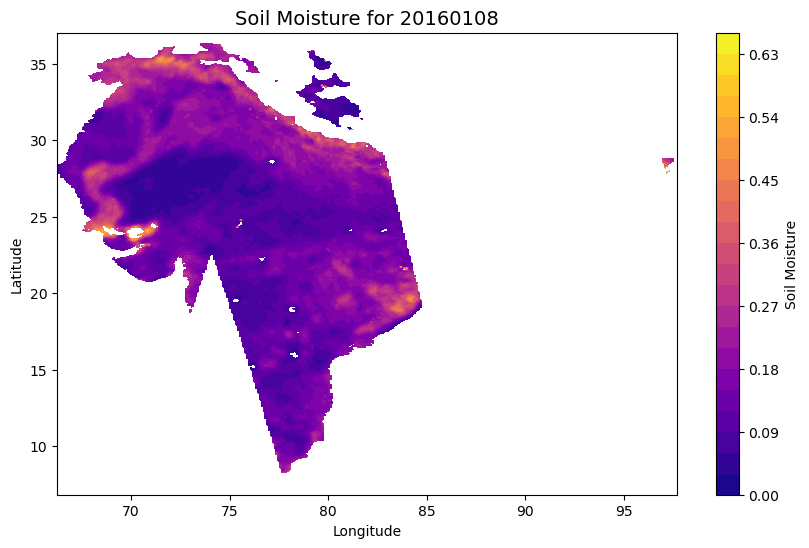

Plotting soil moisture for date: 20160109


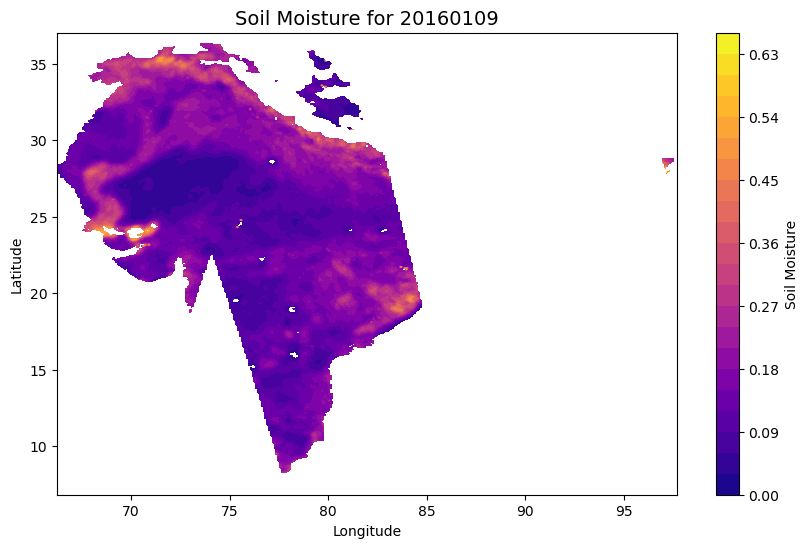

Plotting soil moisture for date: 20160110


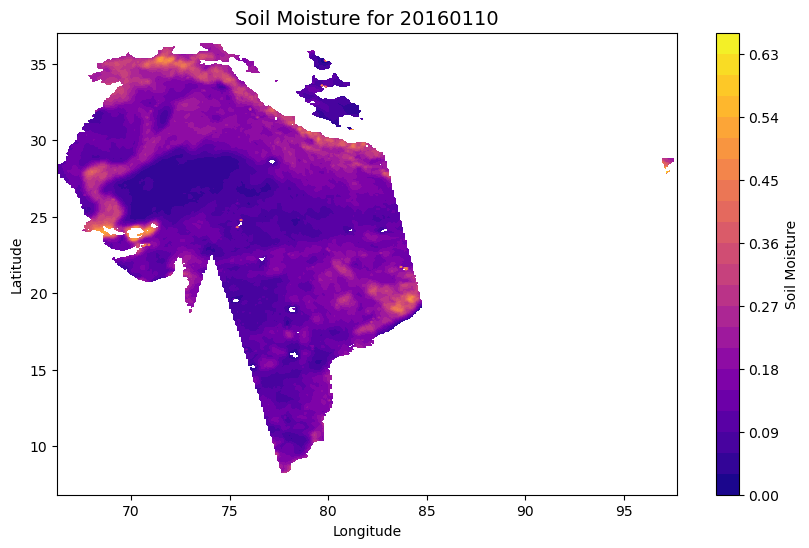

Plotting soil moisture for date: 20160111


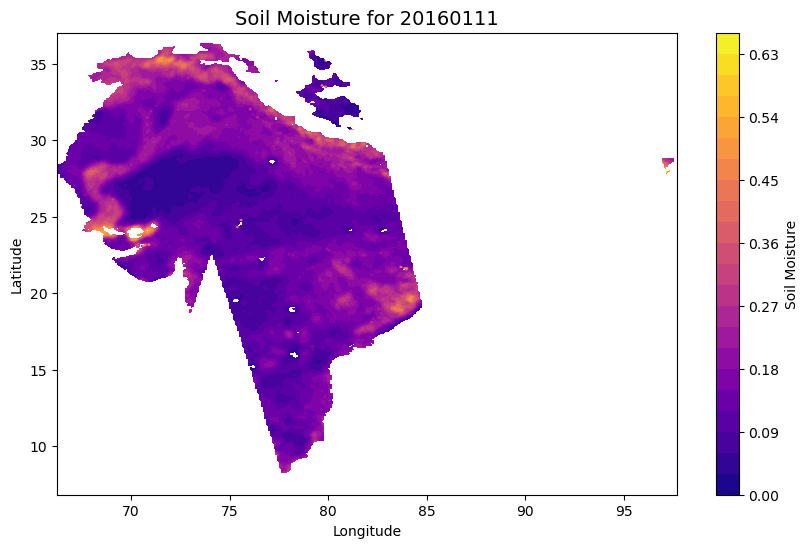

Plotting soil moisture for date: 20160112


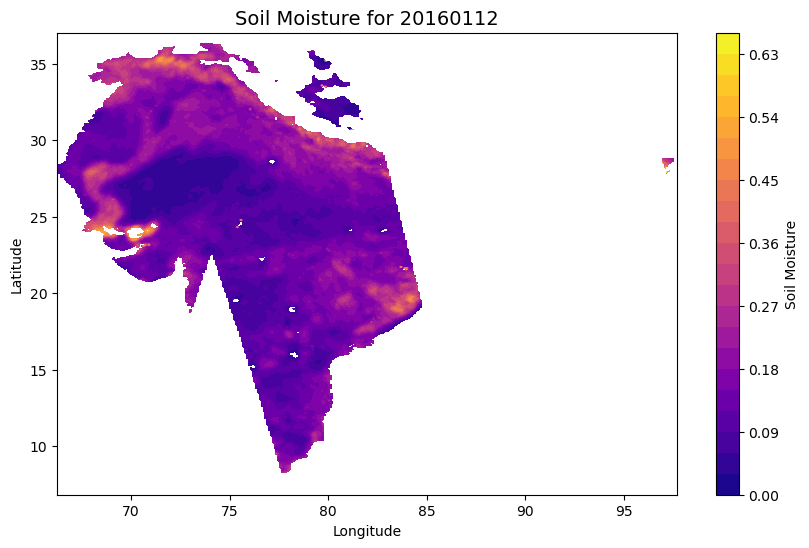

Plotting soil moisture for date: 20160113


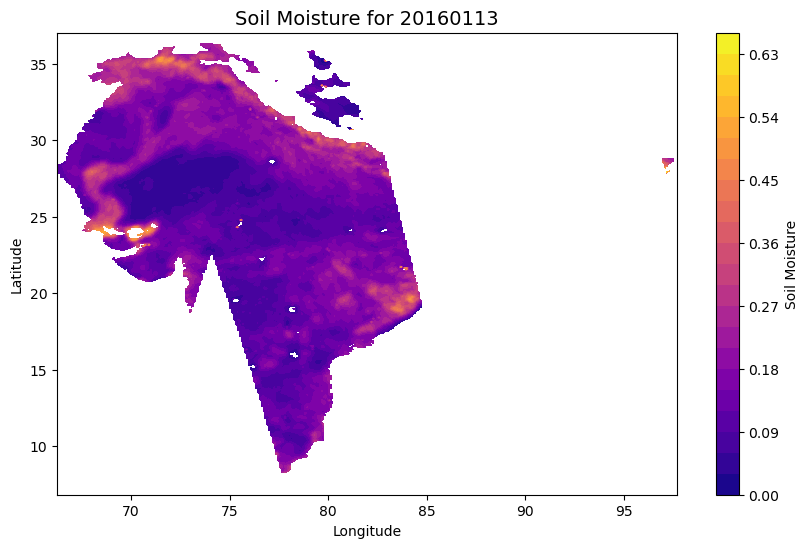

Plotting soil moisture for date: 20160114


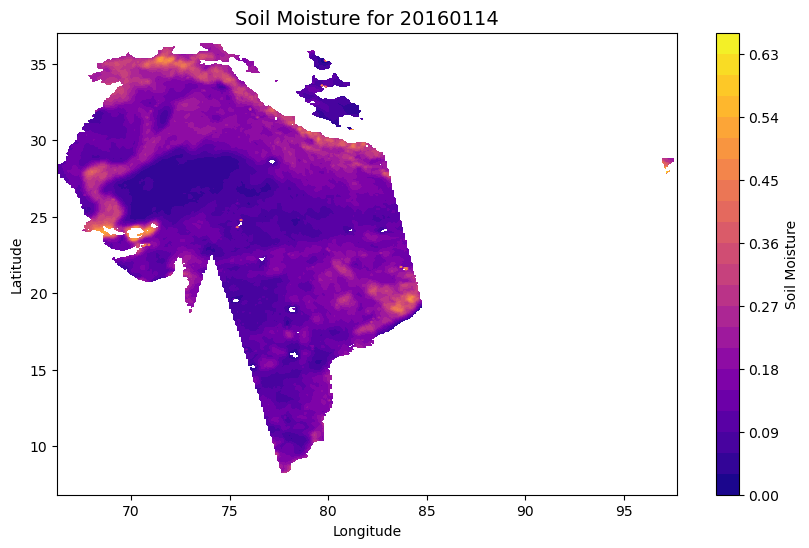

Plotting soil moisture for date: 20160115


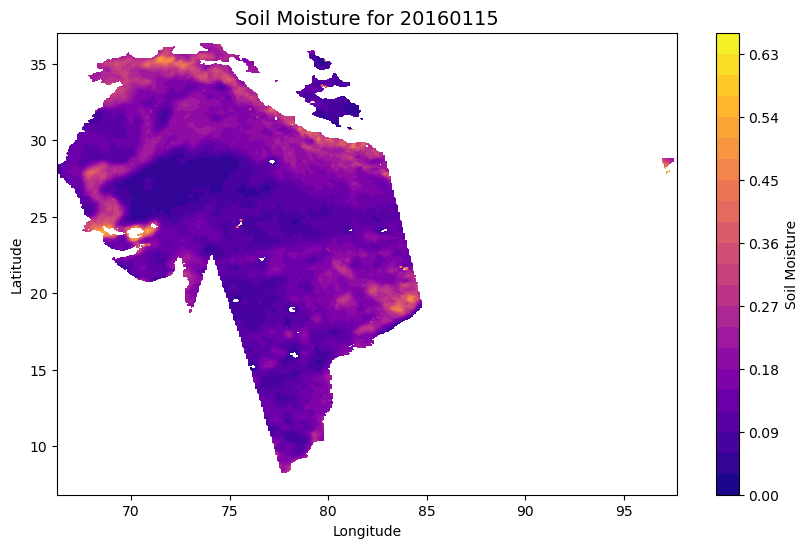

Plotting soil moisture for date: 20160116


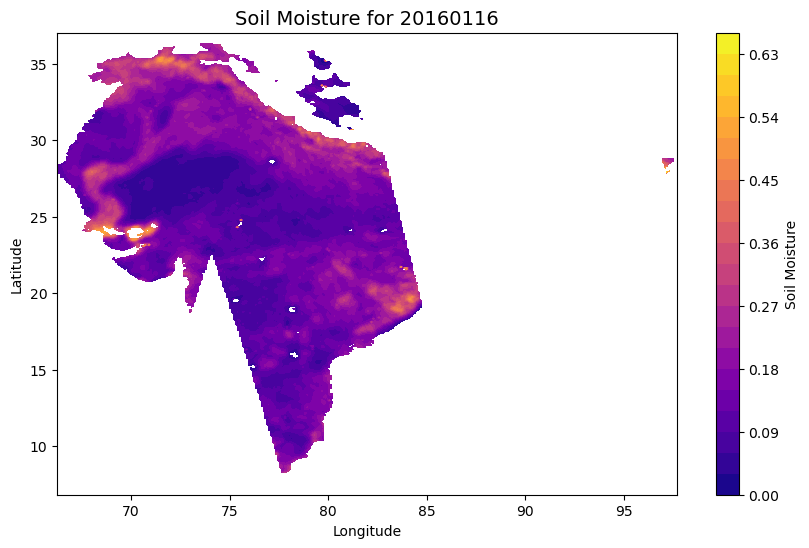

Plotting soil moisture for date: 20160117


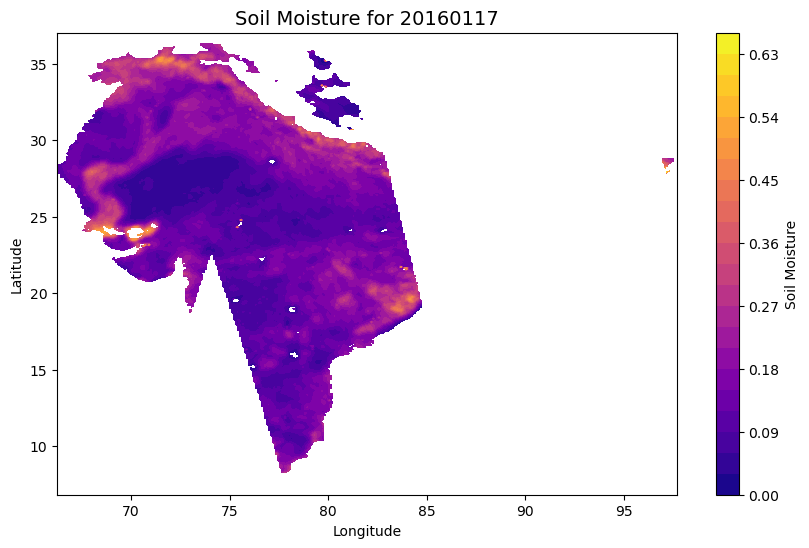

Plotting soil moisture for date: 20160118


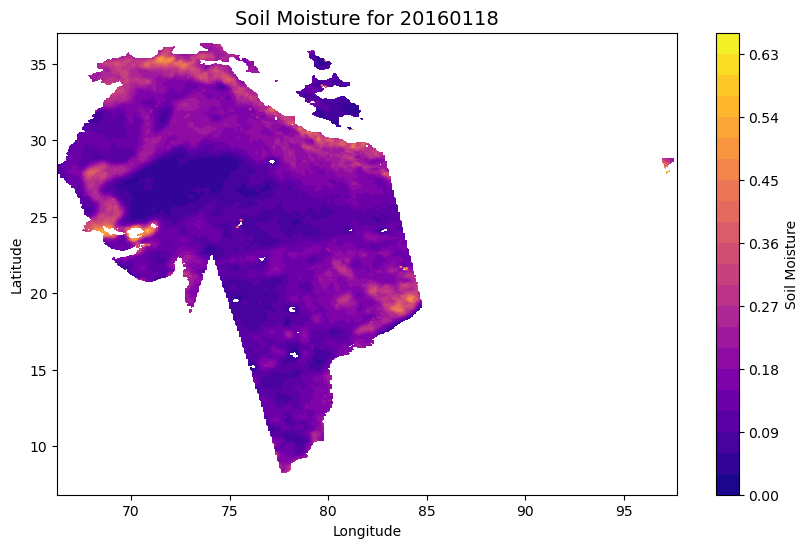

Plotting soil moisture for date: 20160119


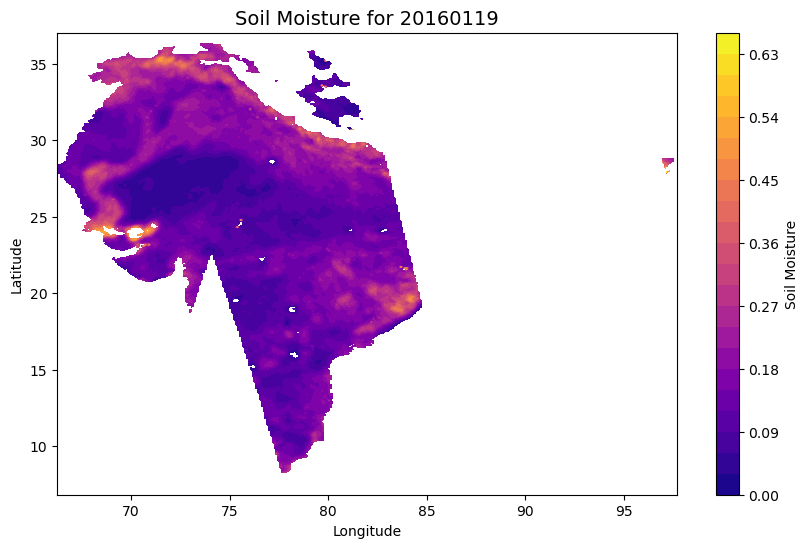

Plotting soil moisture for date: 20160120


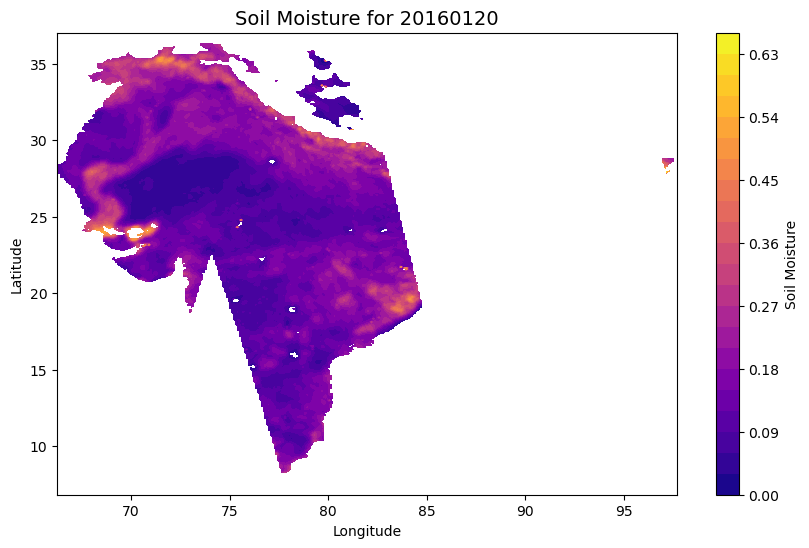

Plotting soil moisture for date: 20160121


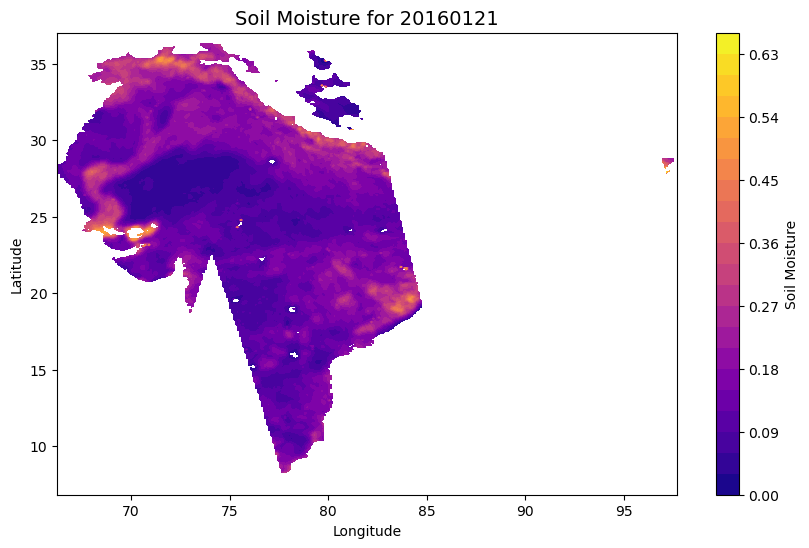

Plotting soil moisture for date: 20160122


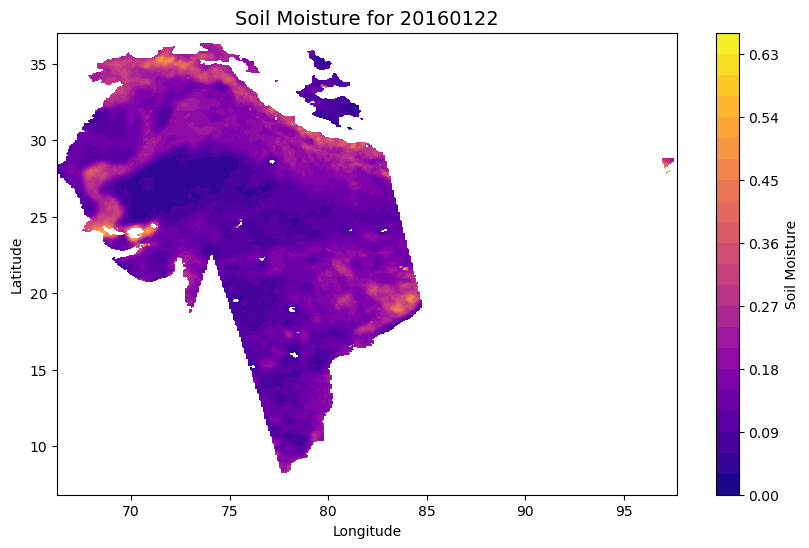

Plotting soil moisture for date: 20160123


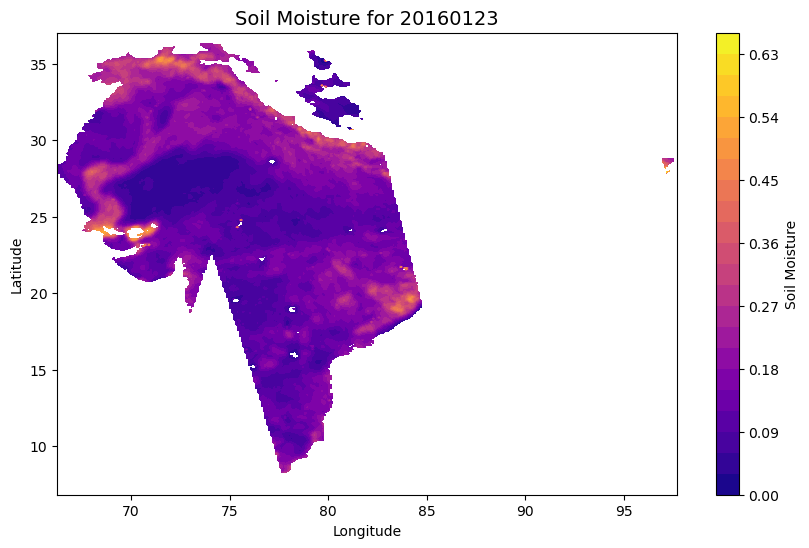

Plotting soil moisture for date: 20160124


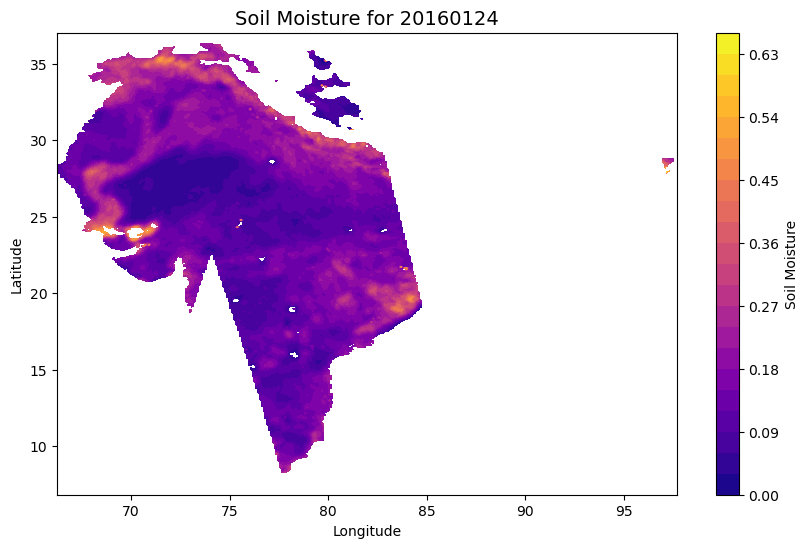

Plotting soil moisture for date: 20160125


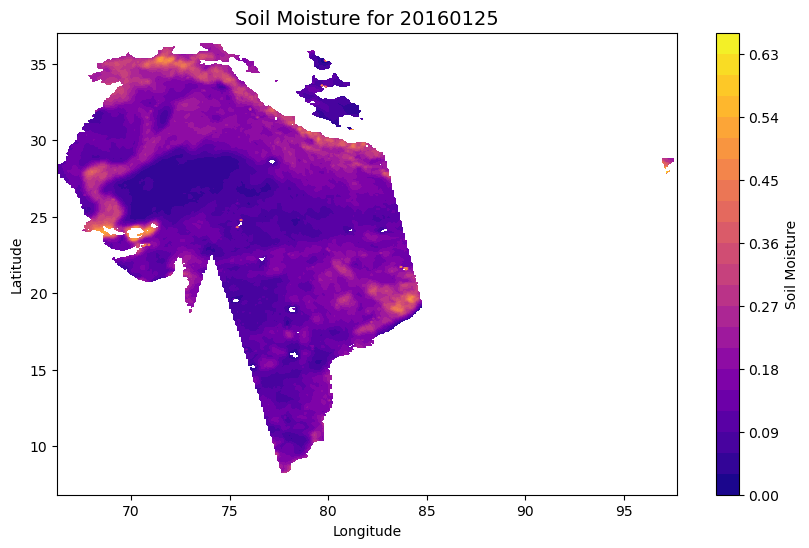

Plotting soil moisture for date: 20160126


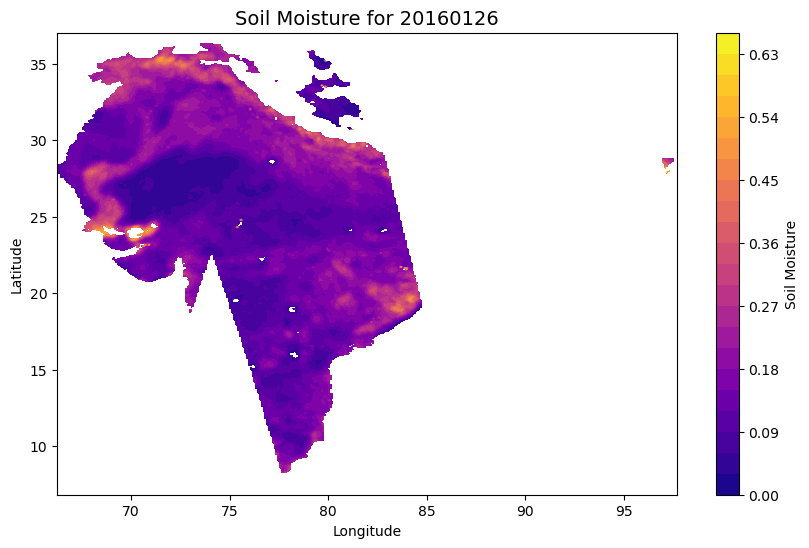

Plotting soil moisture for date: 20160127


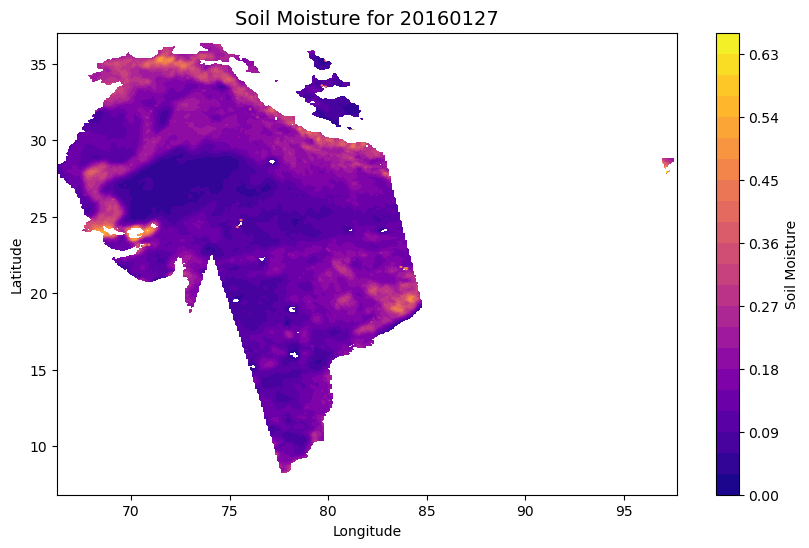

Plotting soil moisture for date: 20160128


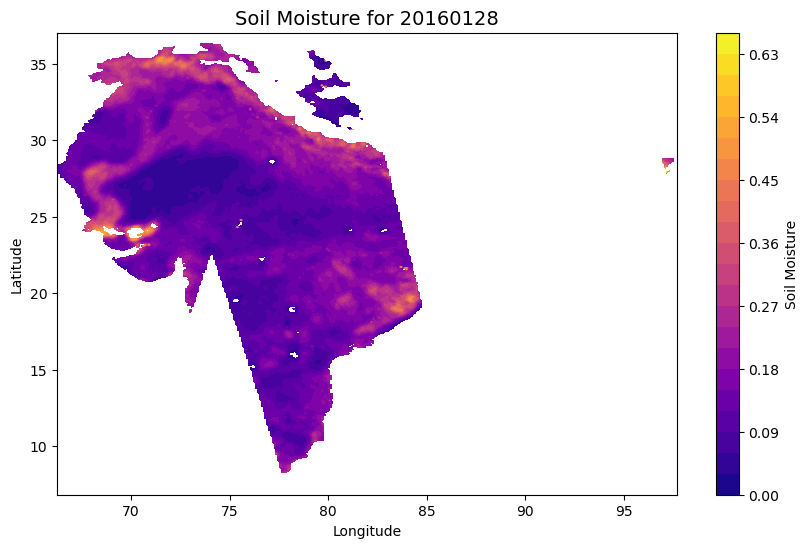

Plotting soil moisture for date: 20160129


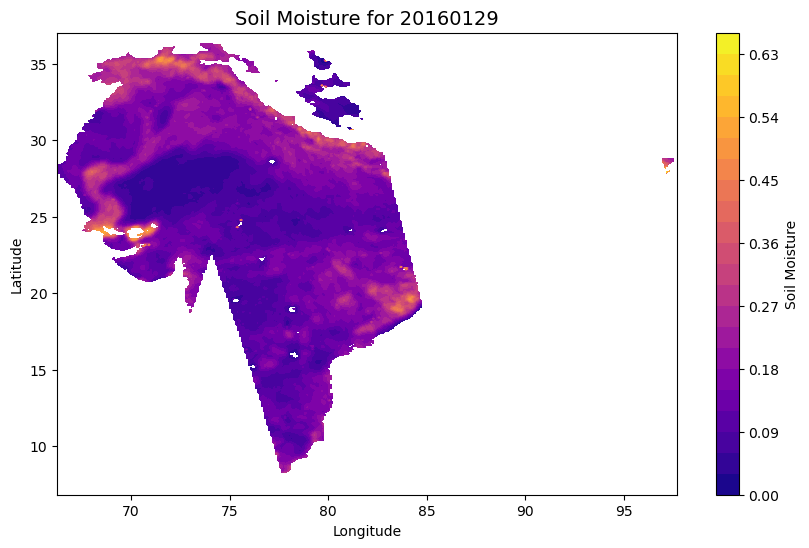

Plotting soil moisture for date: 20160130


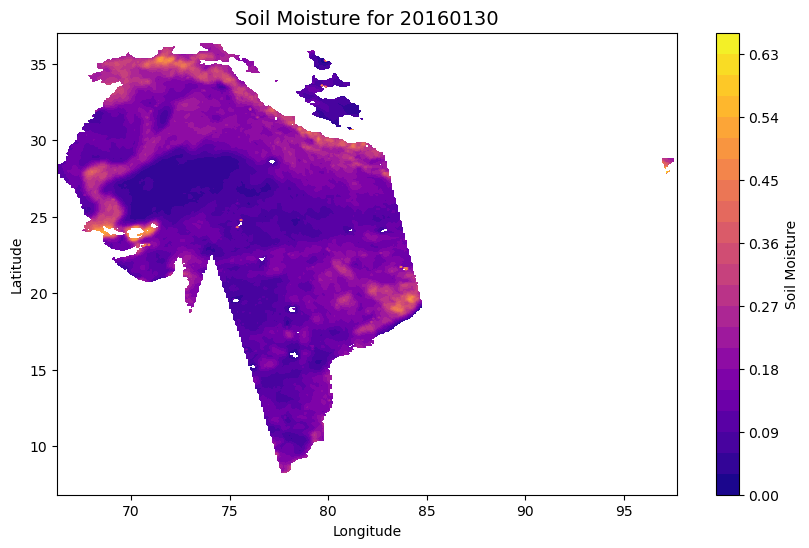

Plotting soil moisture for date: 20160131


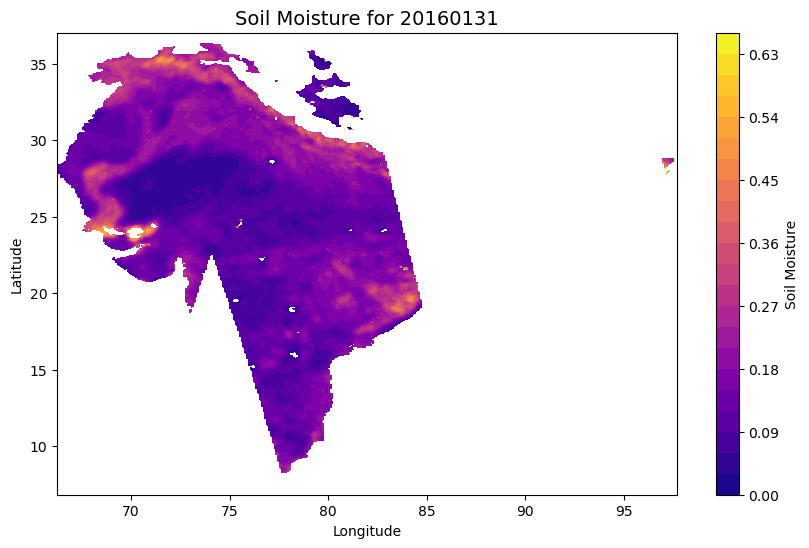

Plotting soil moisture for date: 20160201


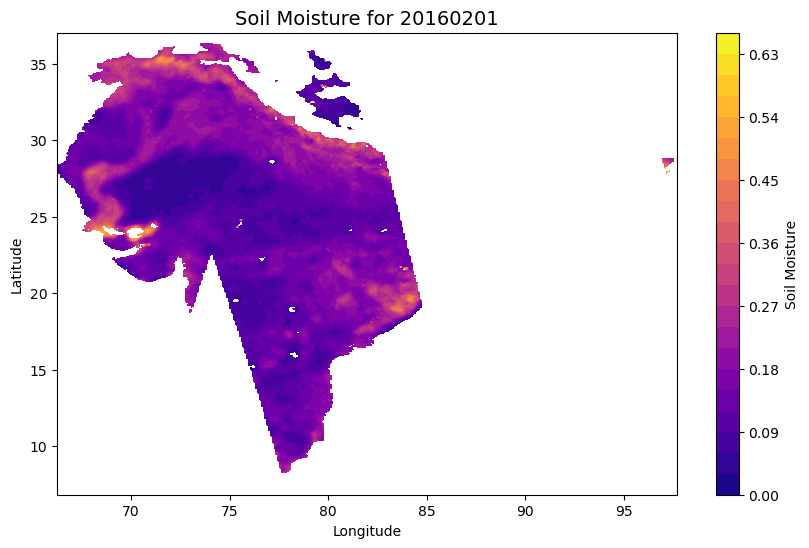

Plotting soil moisture for date: 20160202


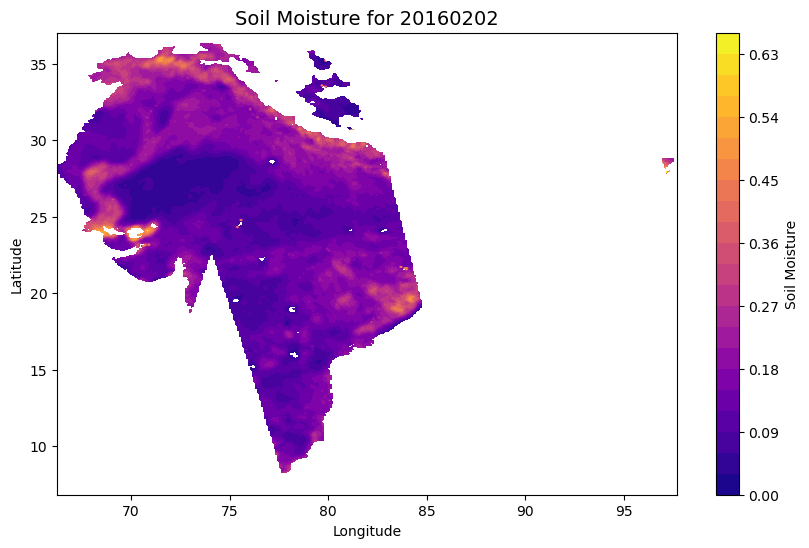

Plotting soil moisture for date: 20160203


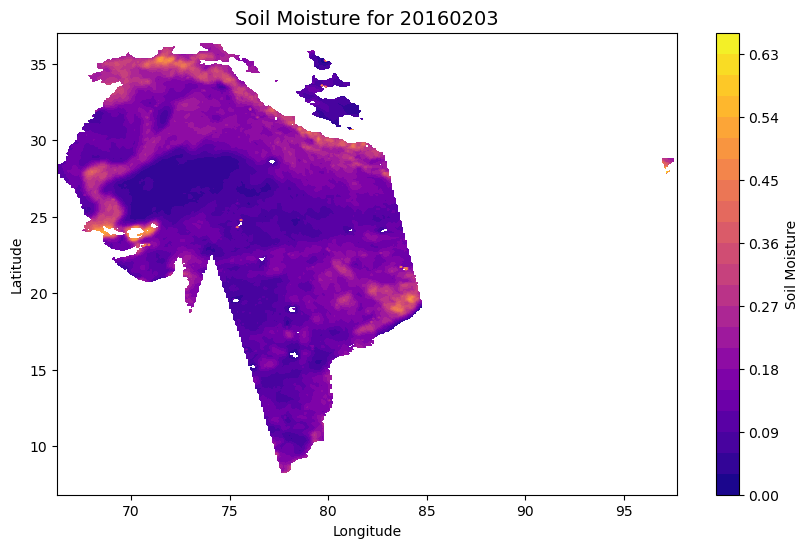

Plotting soil moisture for date: 20160204


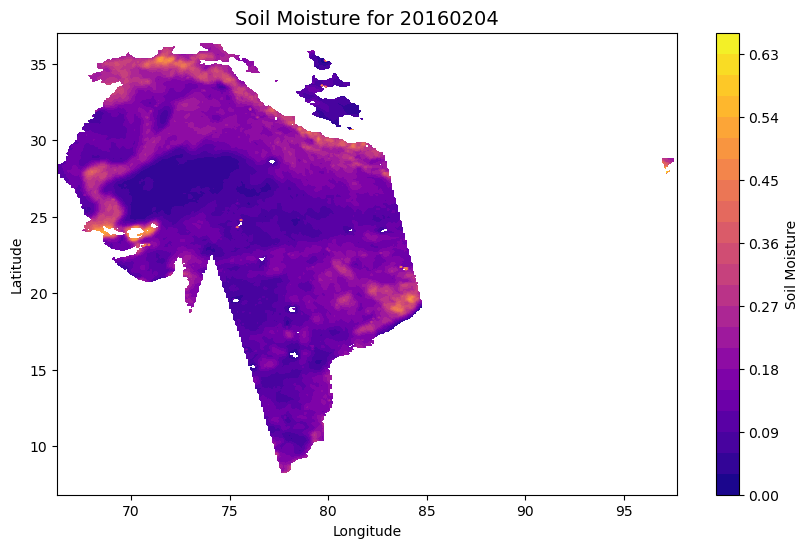

Plotting soil moisture for date: 20160205


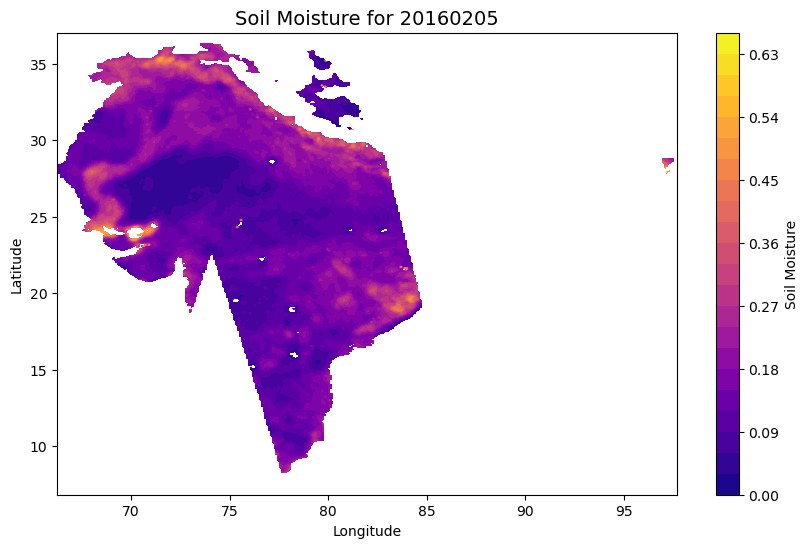

Plotting soil moisture for date: 20160206


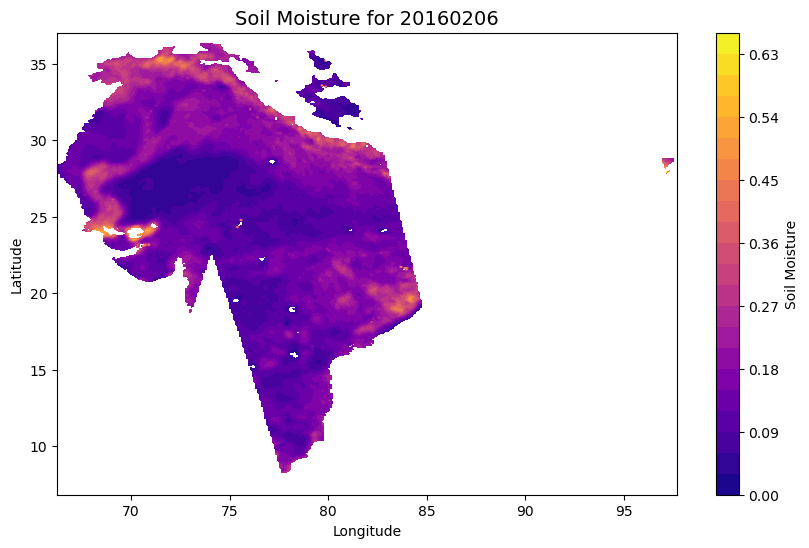

Plotting soil moisture for date: 20160207


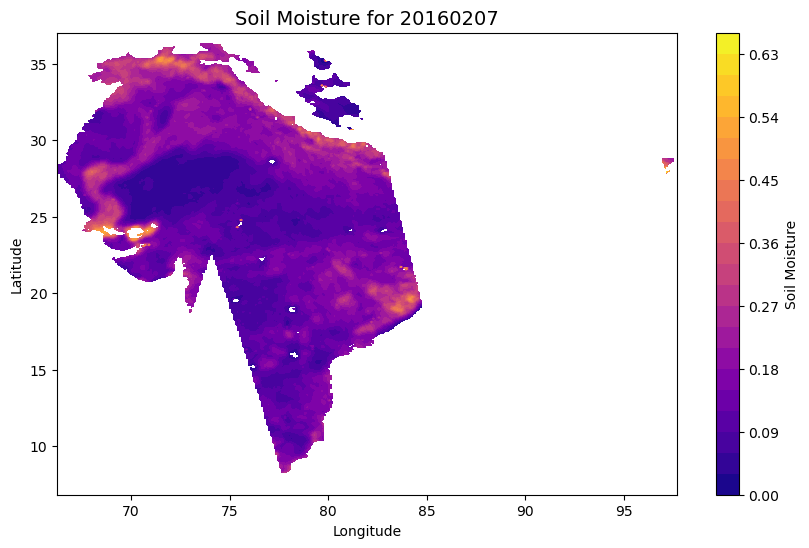

Plotting soil moisture for date: 20160208


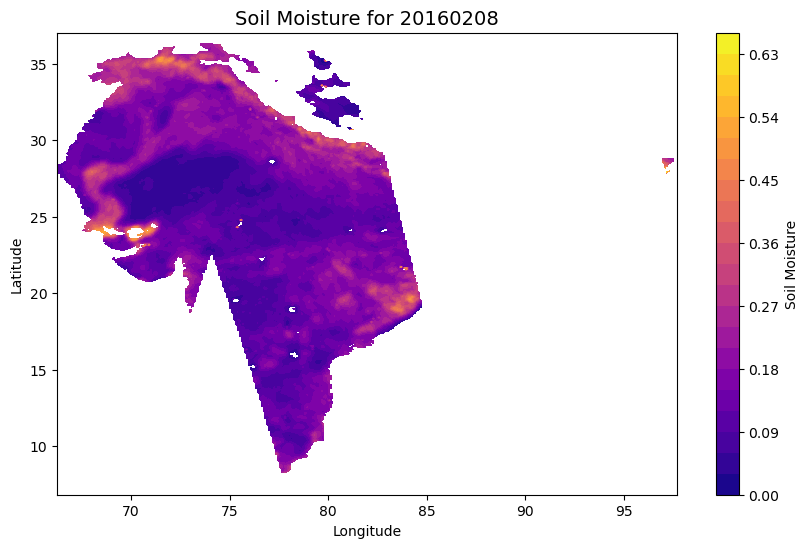

Plotting soil moisture for date: 20160209


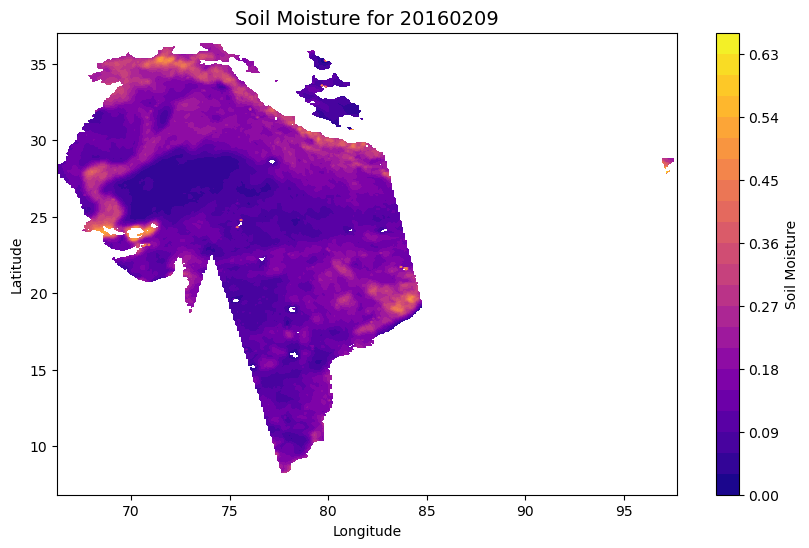

Plotting soil moisture for date: 20160210


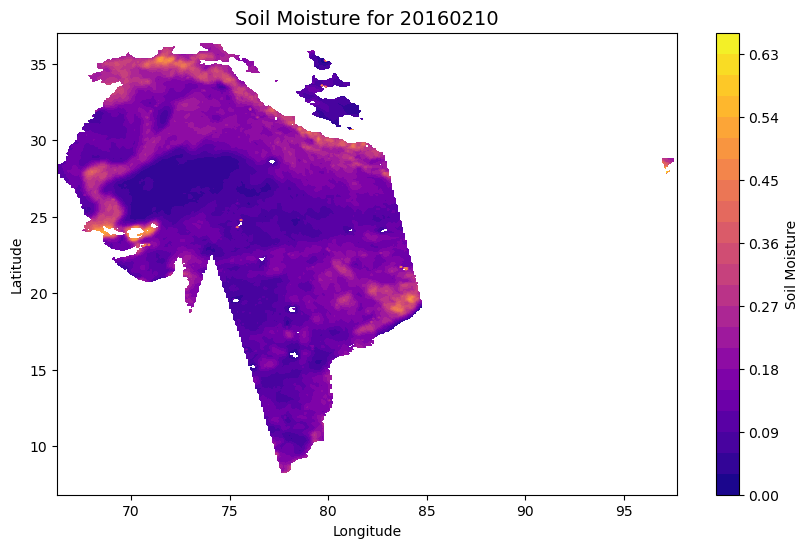

Plotting soil moisture for date: 20160211


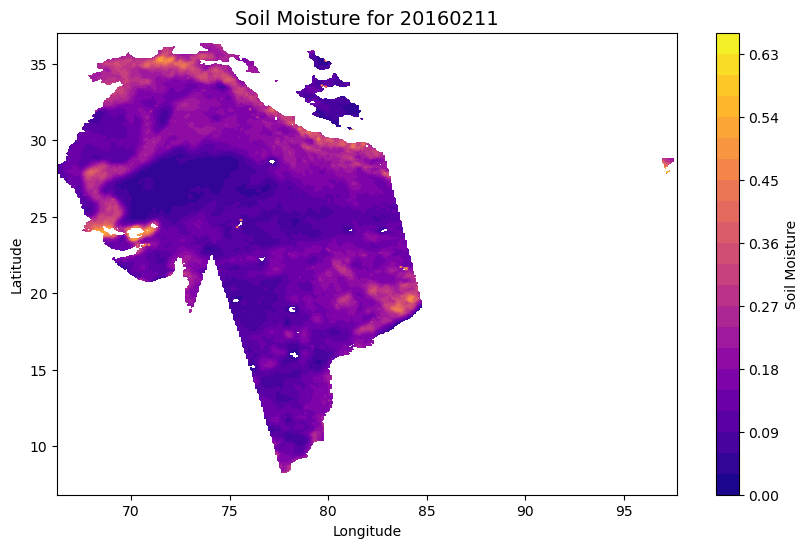

Plotting soil moisture for date: 20160212


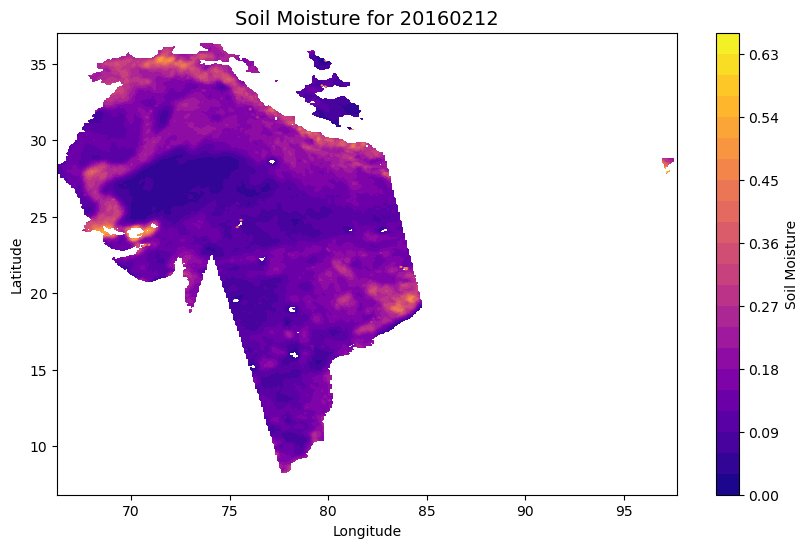

Plotting soil moisture for date: 20160213


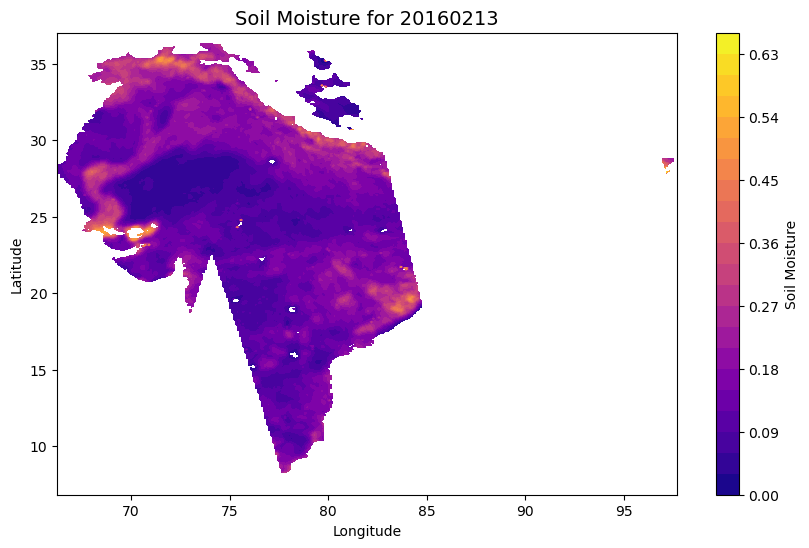

Plotting soil moisture for date: 20160214


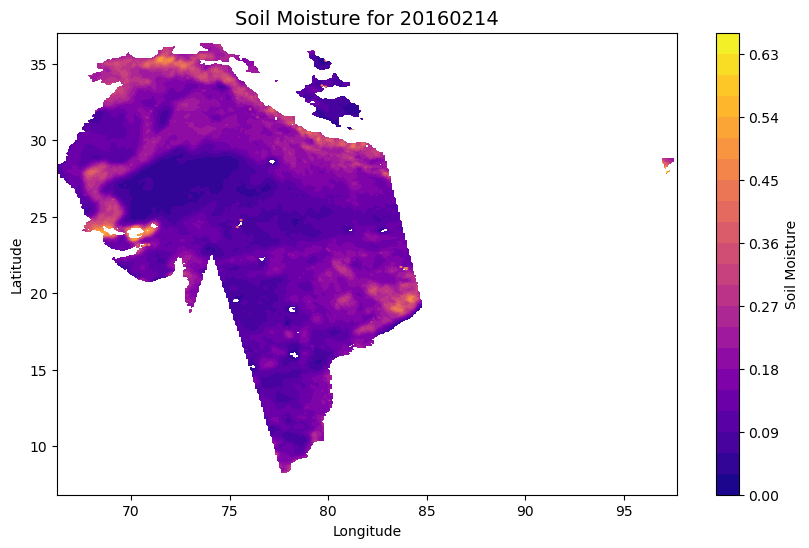

Plotting soil moisture for date: 20160215


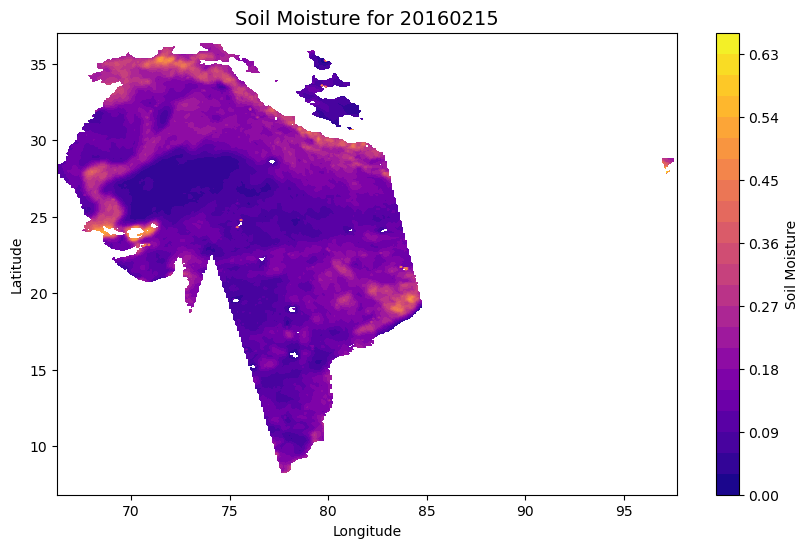

Plotting soil moisture for date: 20160216


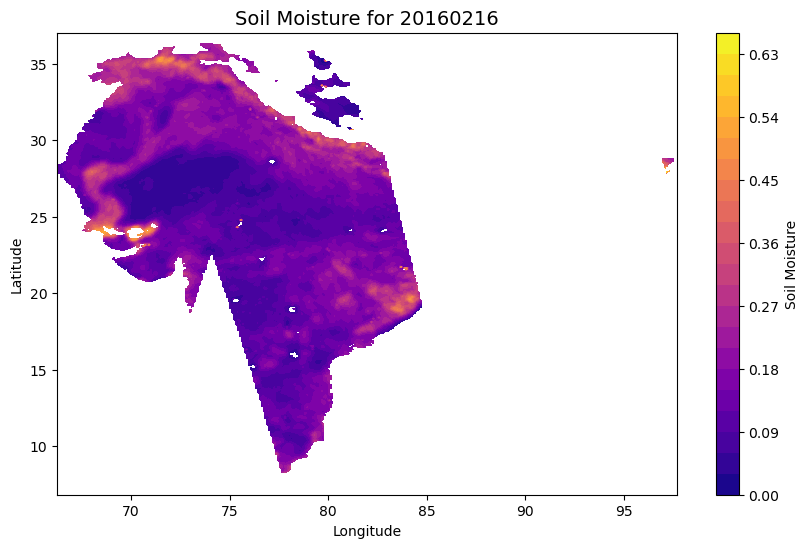

Plotting soil moisture for date: 20160217


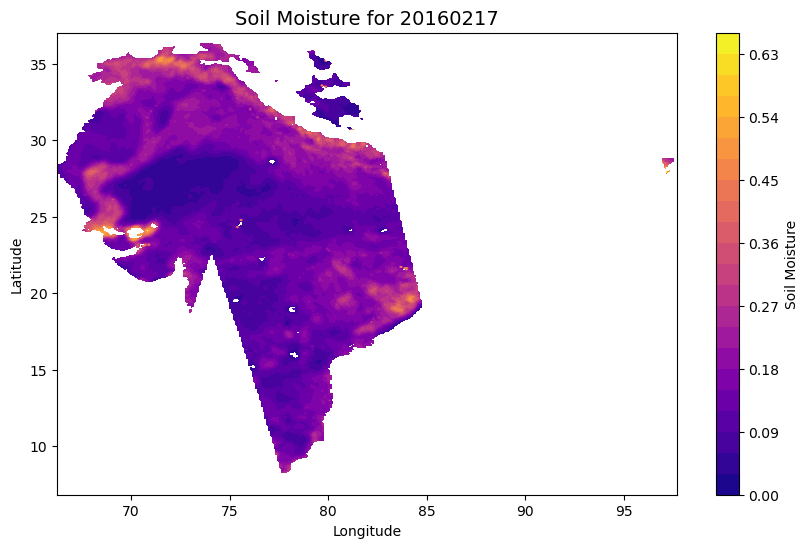

Plotting soil moisture for date: 20160218


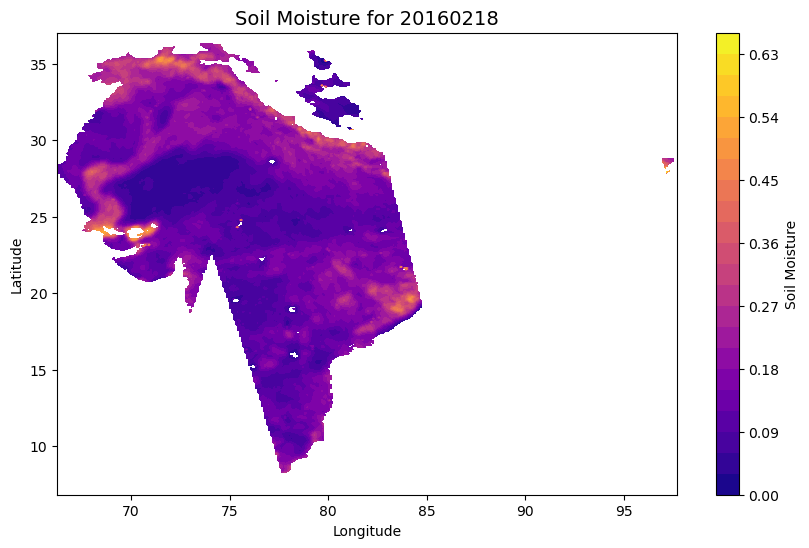

Plotting soil moisture for date: 20160219


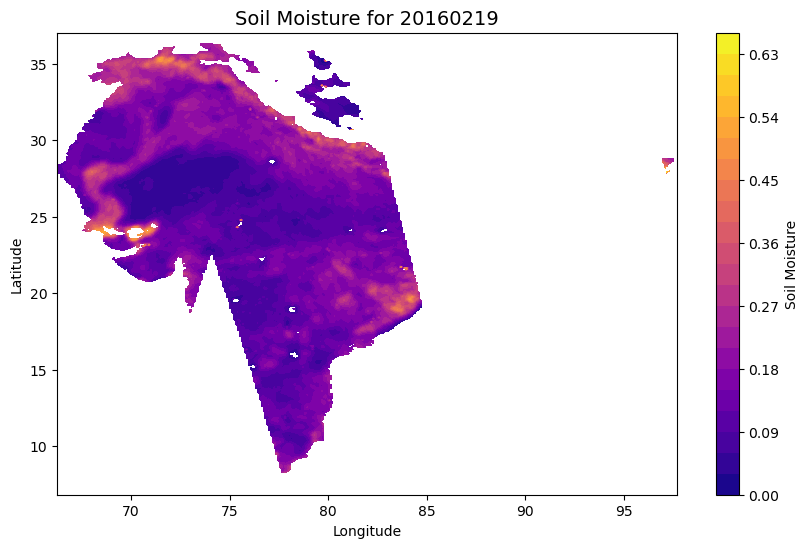

Plotting soil moisture for date: 20160220


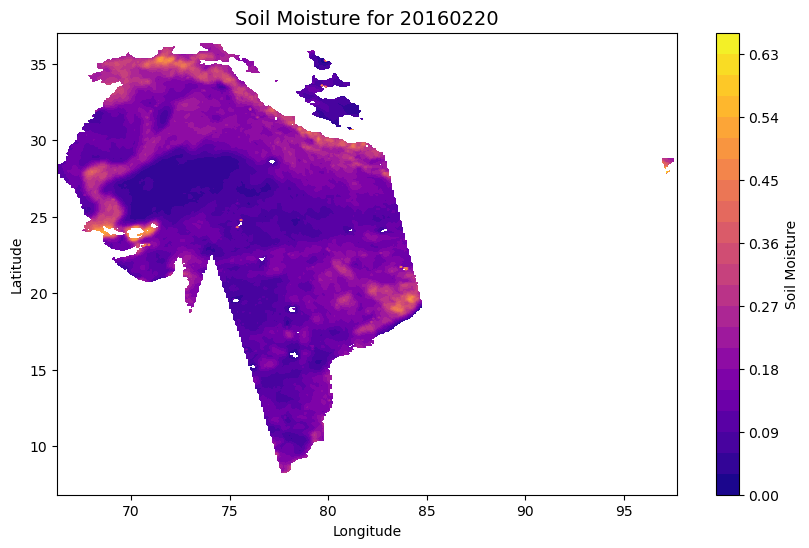

Plotting soil moisture for date: 20160221


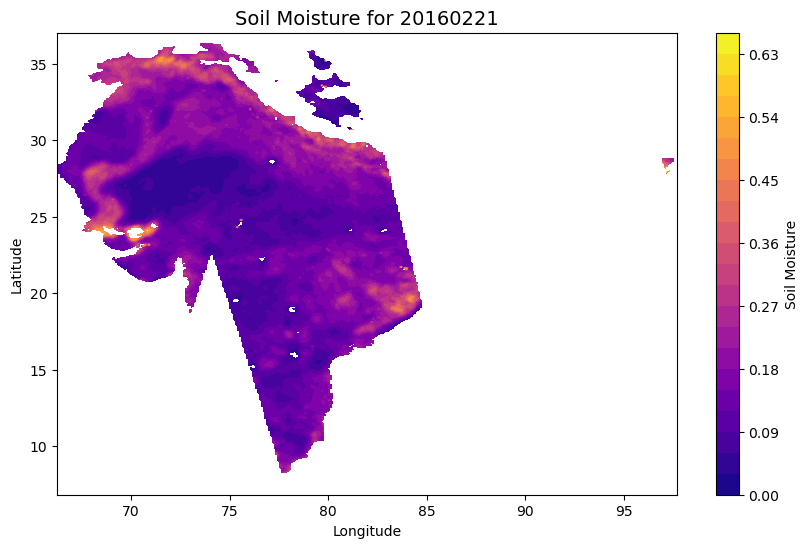

Plotting soil moisture for date: 20160222


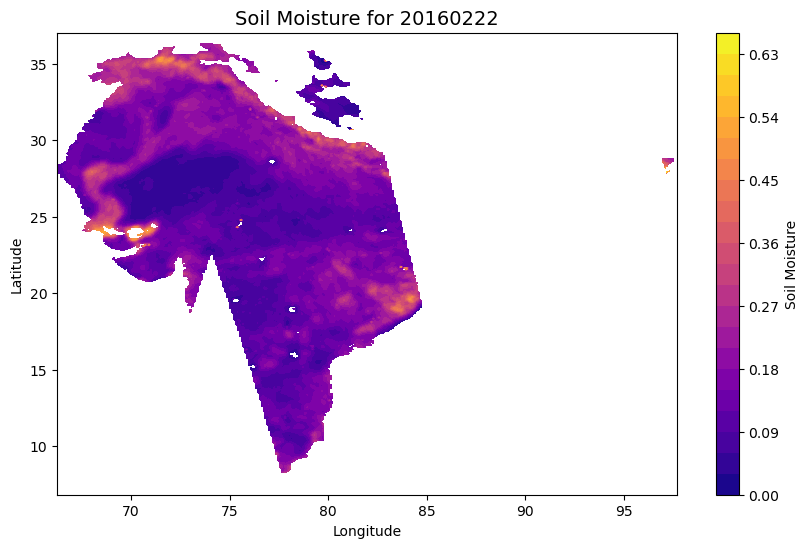

Plotting soil moisture for date: 20160223


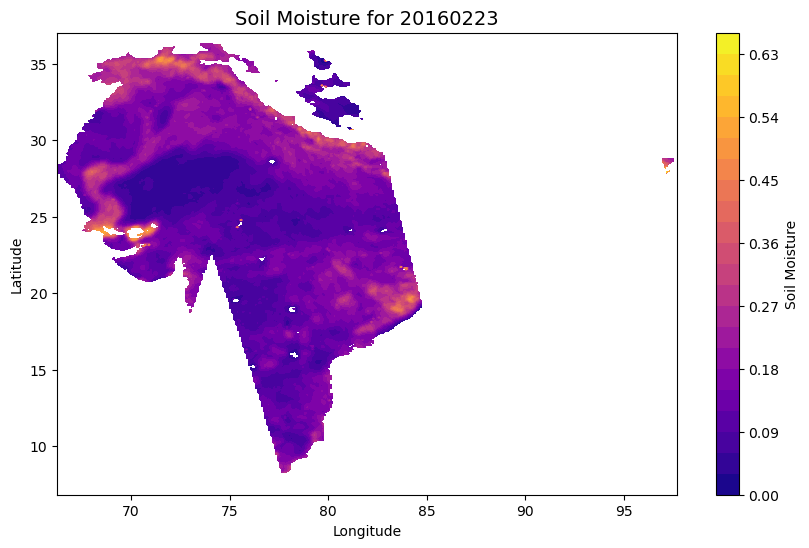

Plotting soil moisture for date: 20160224


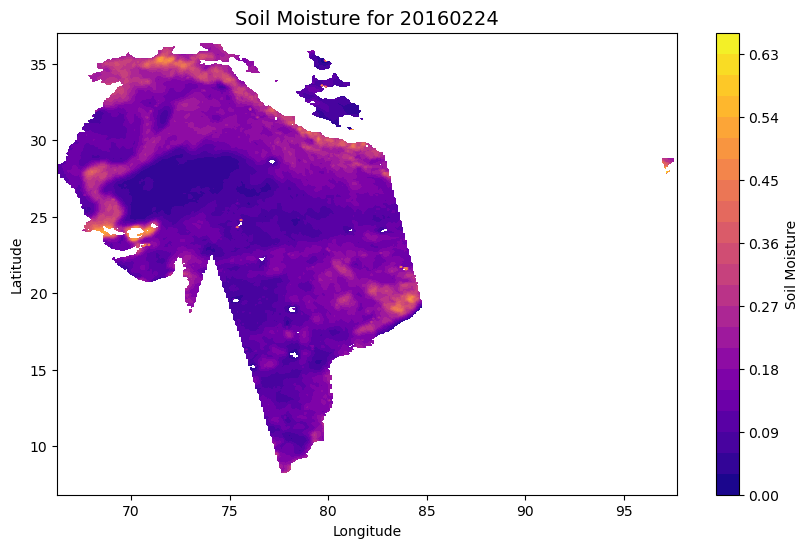

Plotting soil moisture for date: 20160225


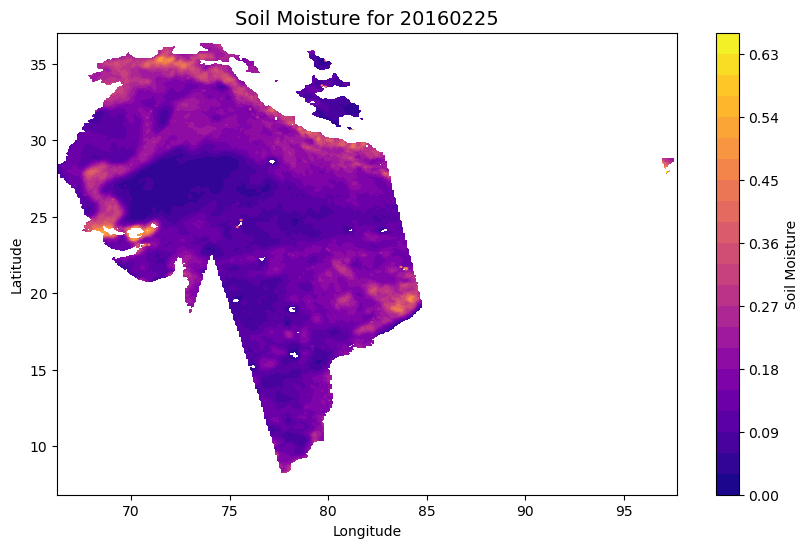

Plotting soil moisture for date: 20160226


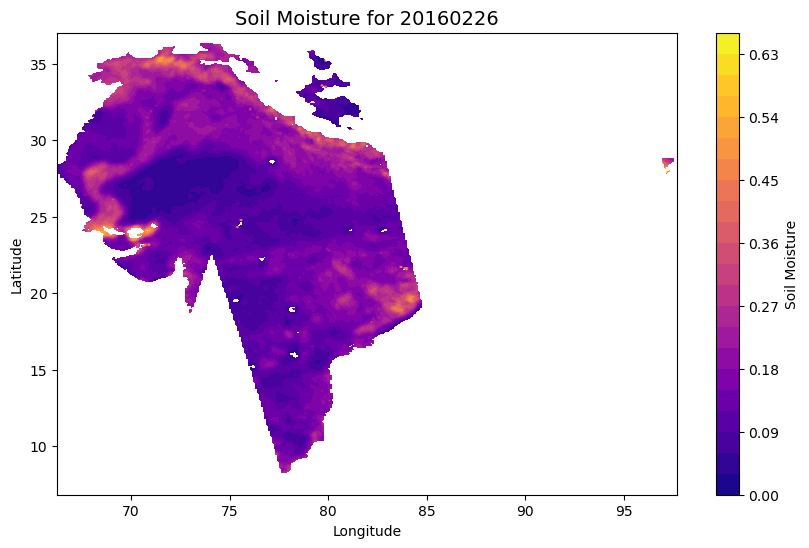

Plotting soil moisture for date: 20160227


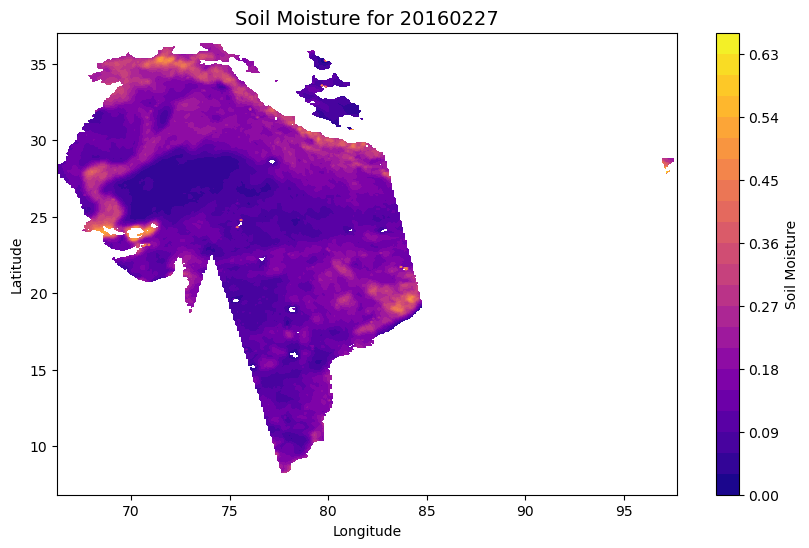

Plotting soil moisture for date: 20160228


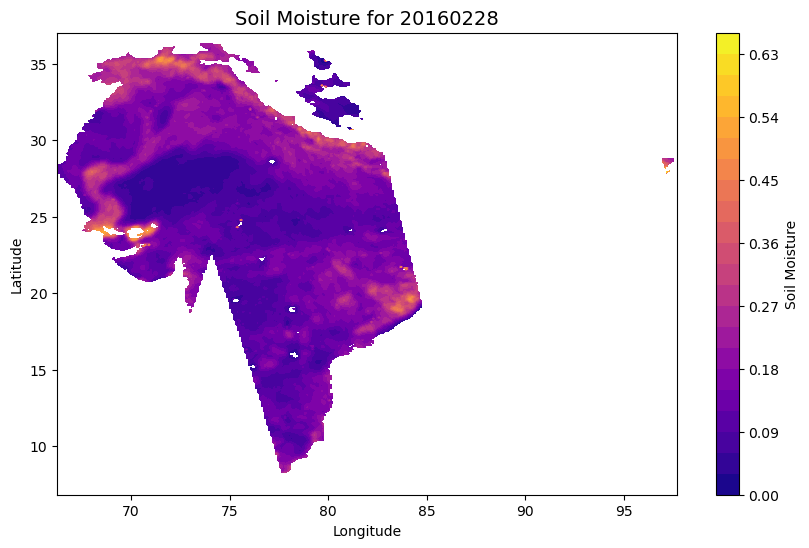

Plotting soil moisture for date: 20160229


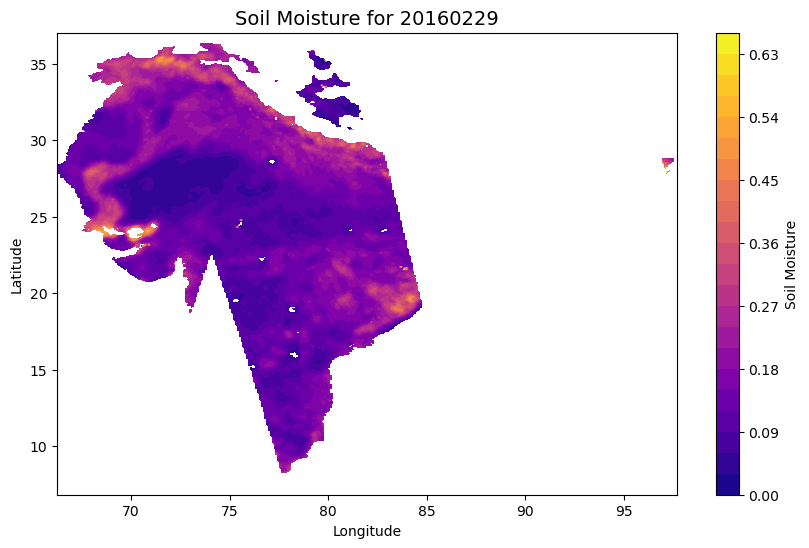

Plotting soil moisture for date: 20160301


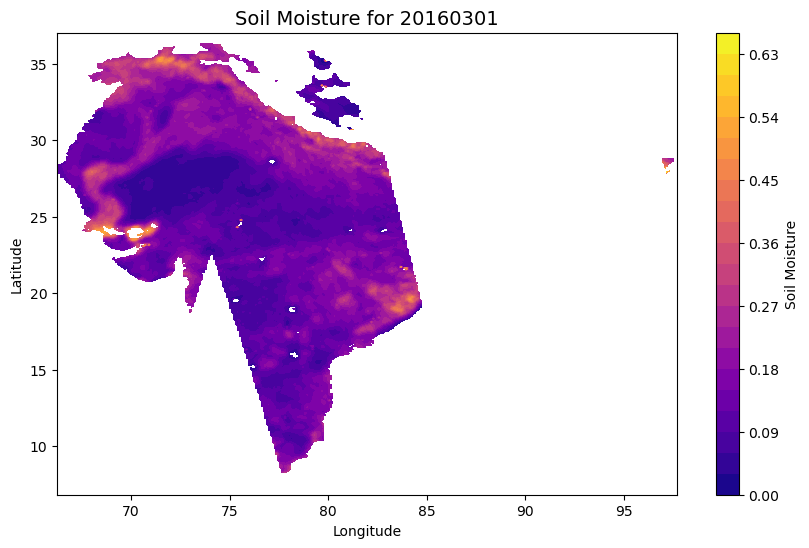

Plotting soil moisture for date: 20160302


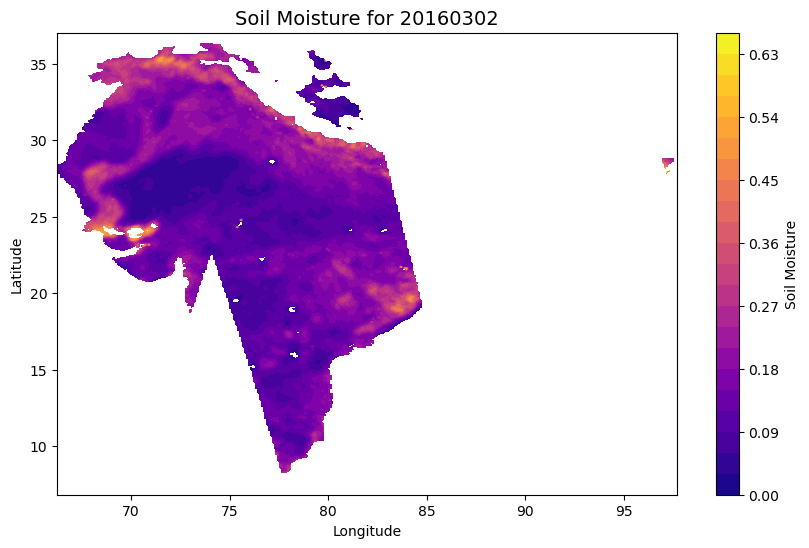

Plotting soil moisture for date: 20160303


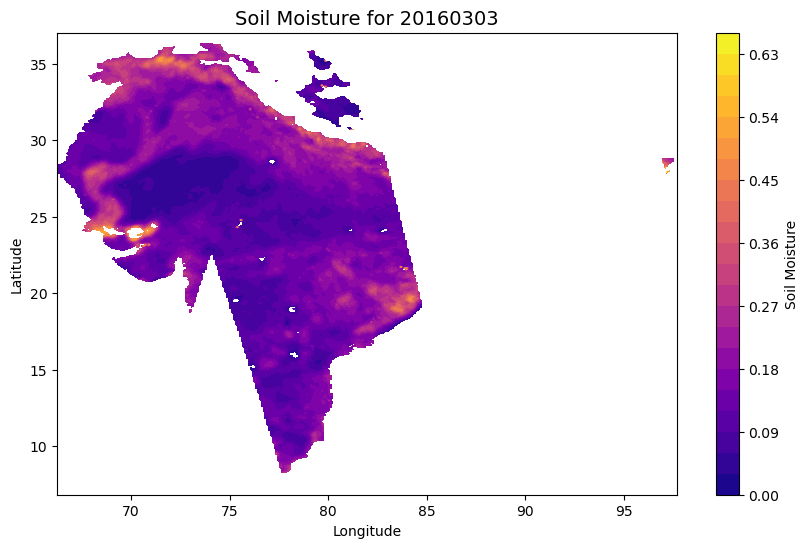

Plotting soil moisture for date: 20160304


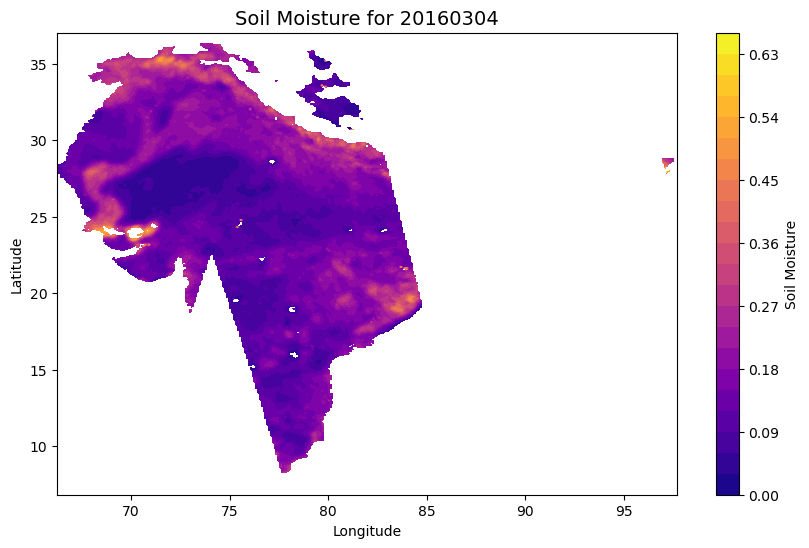

Plotting soil moisture for date: 20160305


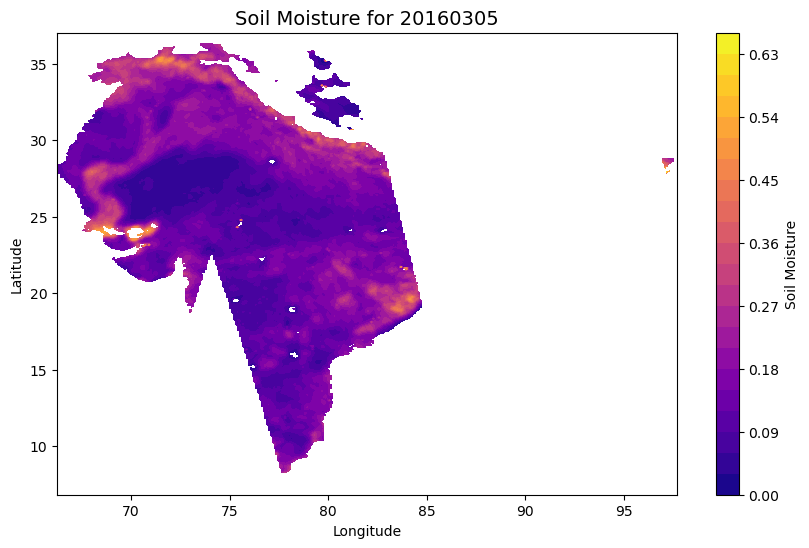

Plotting soil moisture for date: 20160306


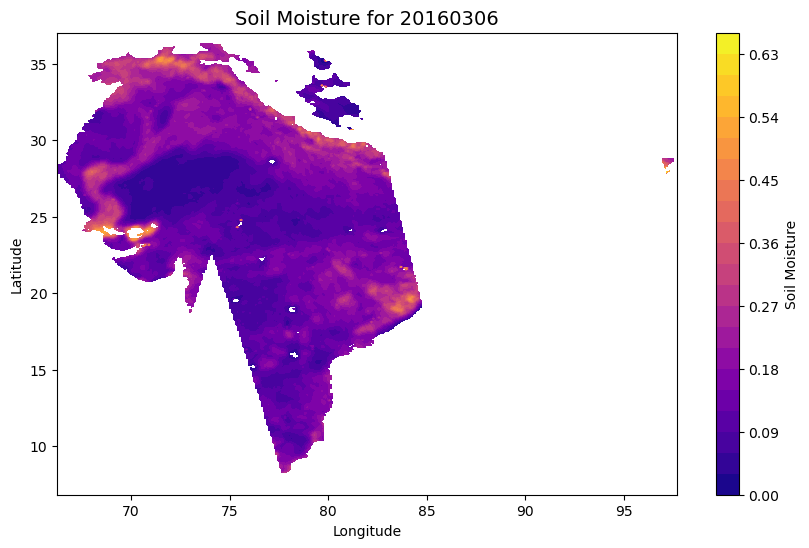

Plotting soil moisture for date: 20160307


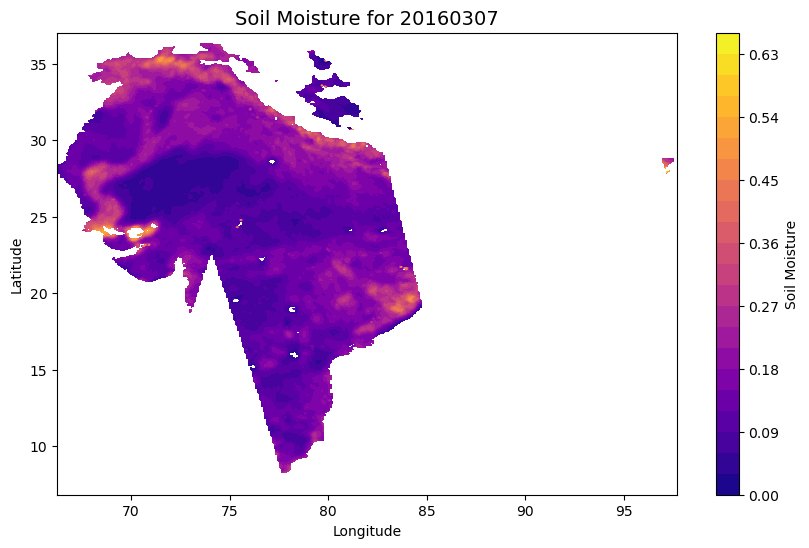

Plotting soil moisture for date: 20160308


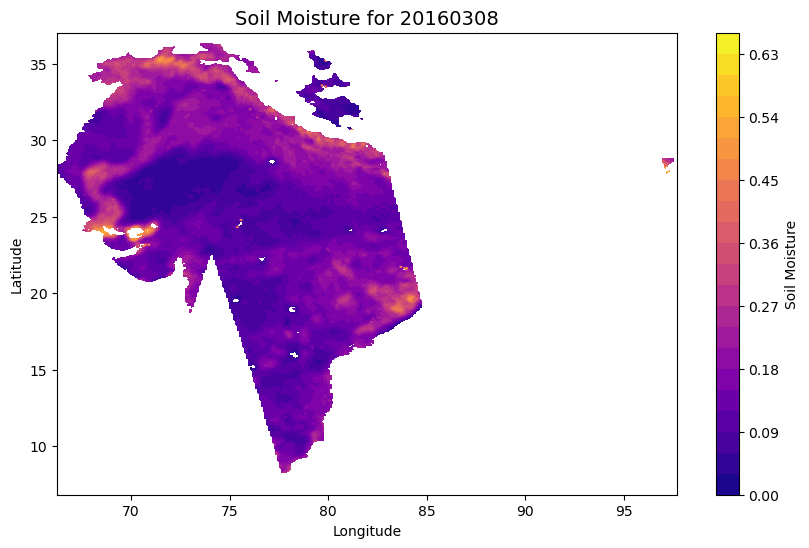

Plotting soil moisture for date: 20160309


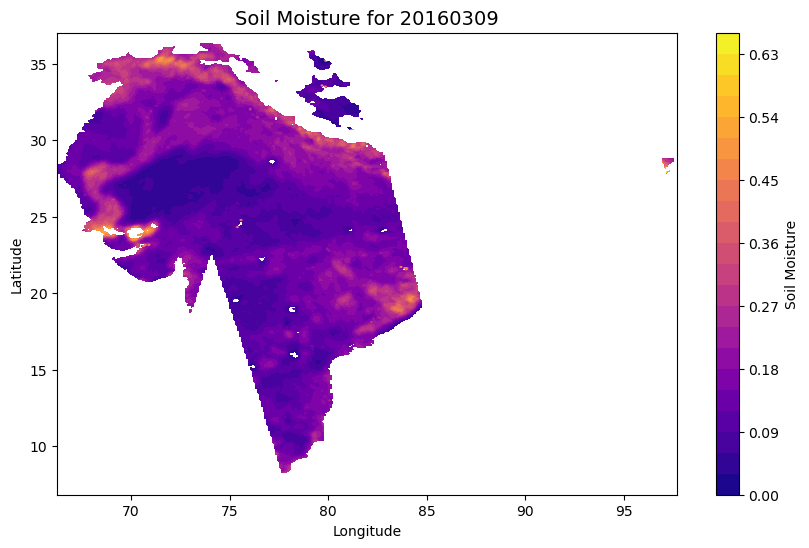

Plotting soil moisture for date: 20160310


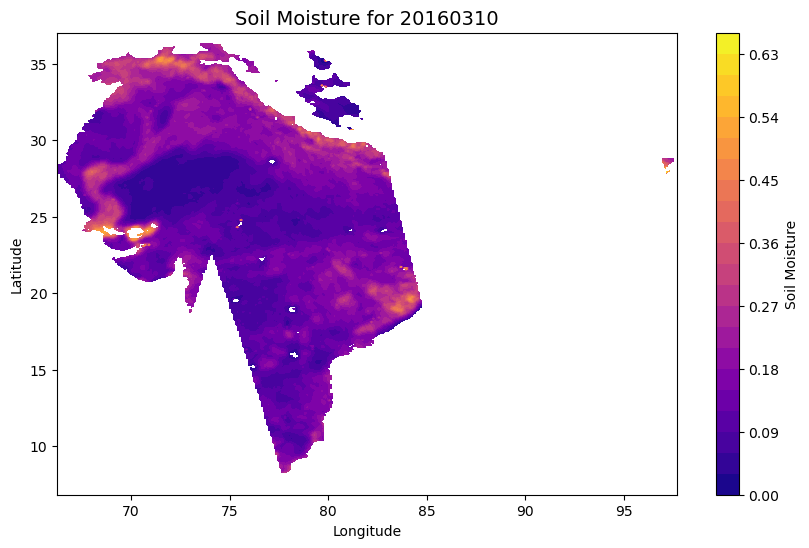

Plotting soil moisture for date: 20160311


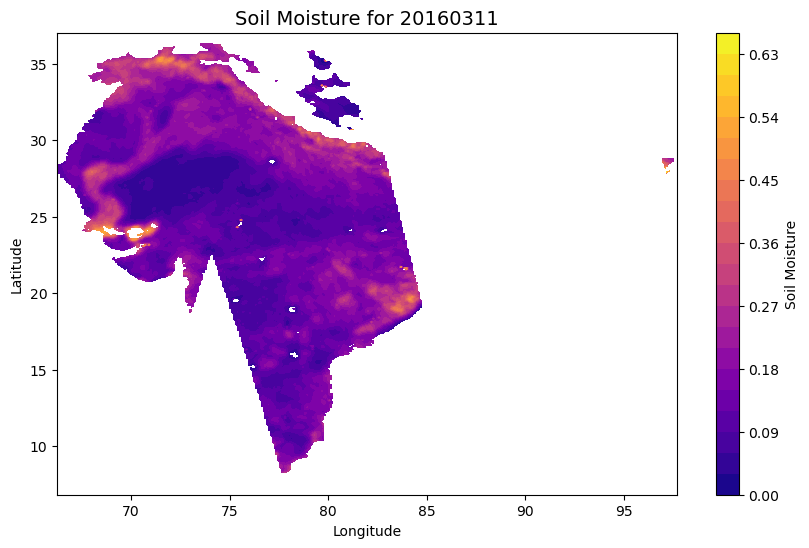

Plotting soil moisture for date: 20160312


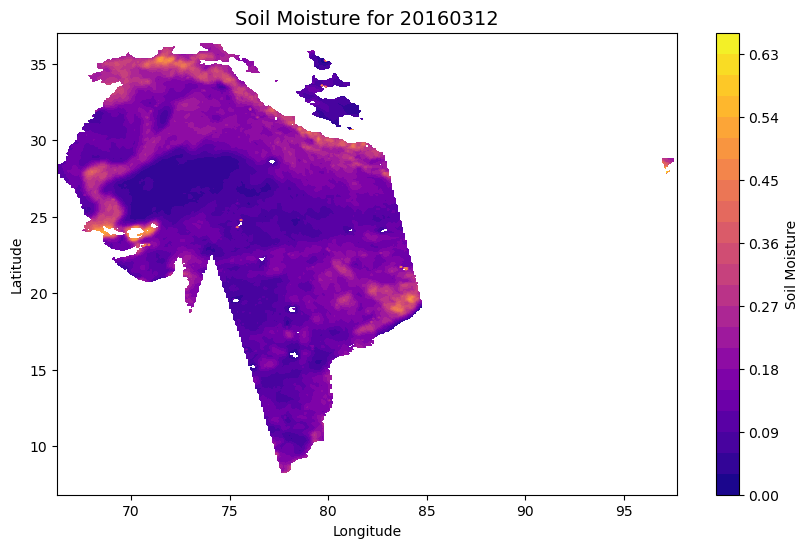

Plotting soil moisture for date: 20160313


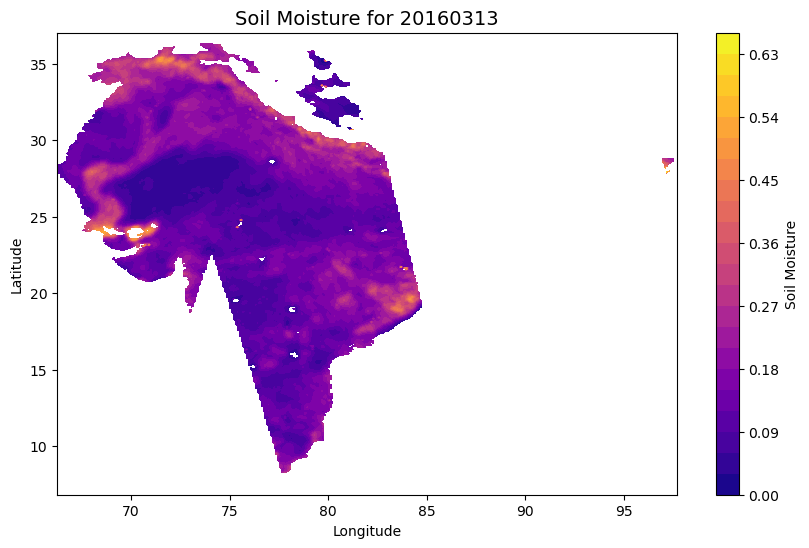

Plotting soil moisture for date: 20160314


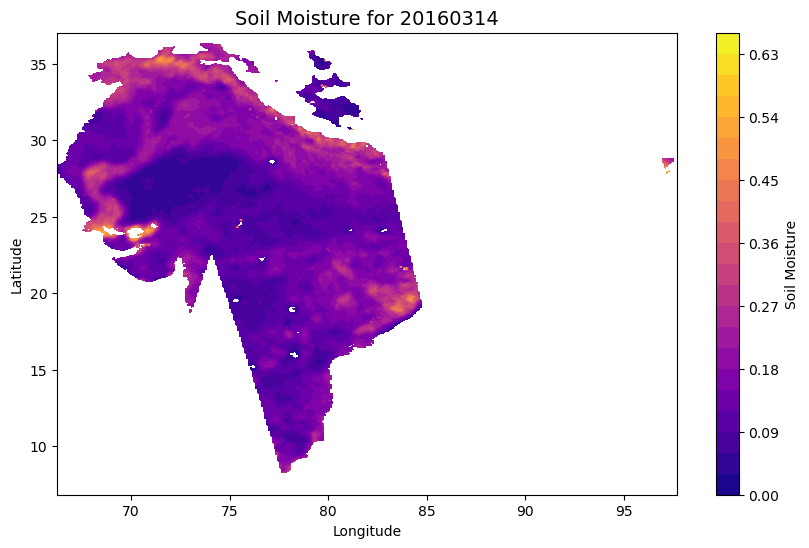

Plotting soil moisture for date: 20160315


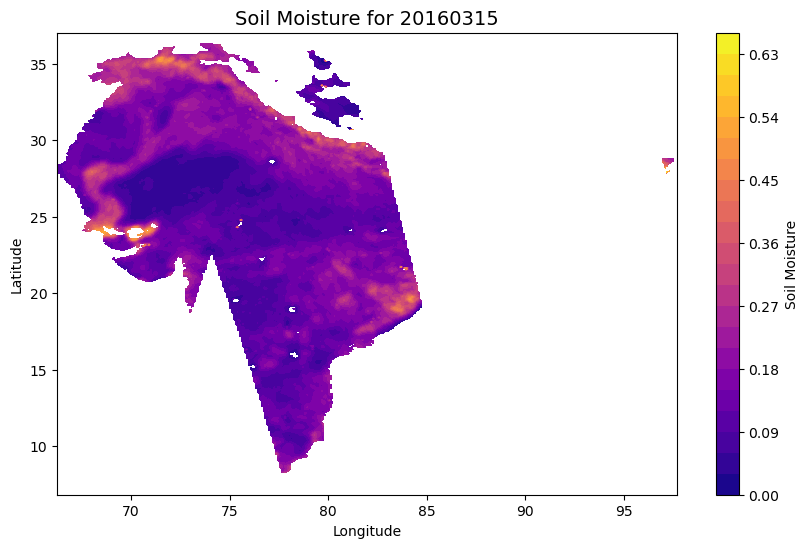

Plotting soil moisture for date: 20160316


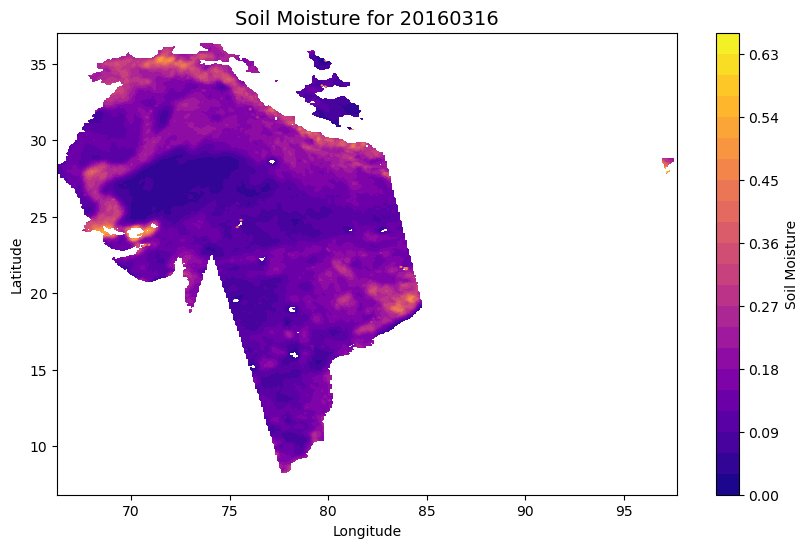

Plotting soil moisture for date: 20160317


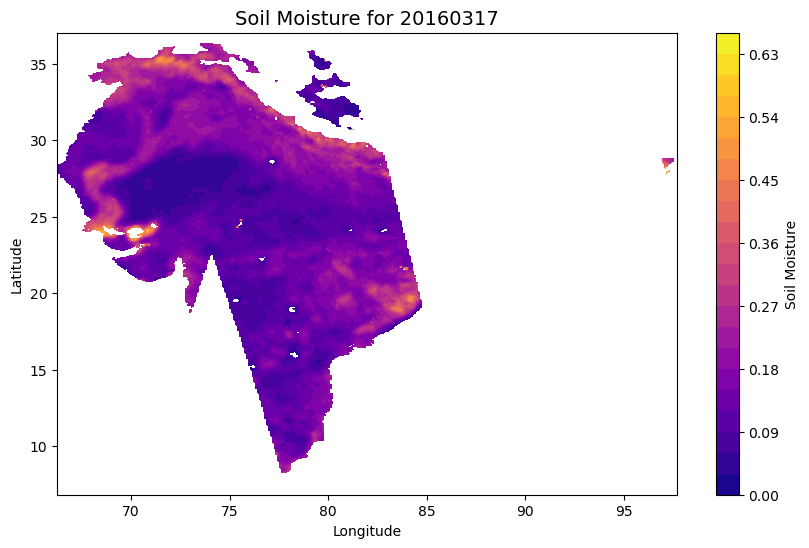

Plotting soil moisture for date: 20160318


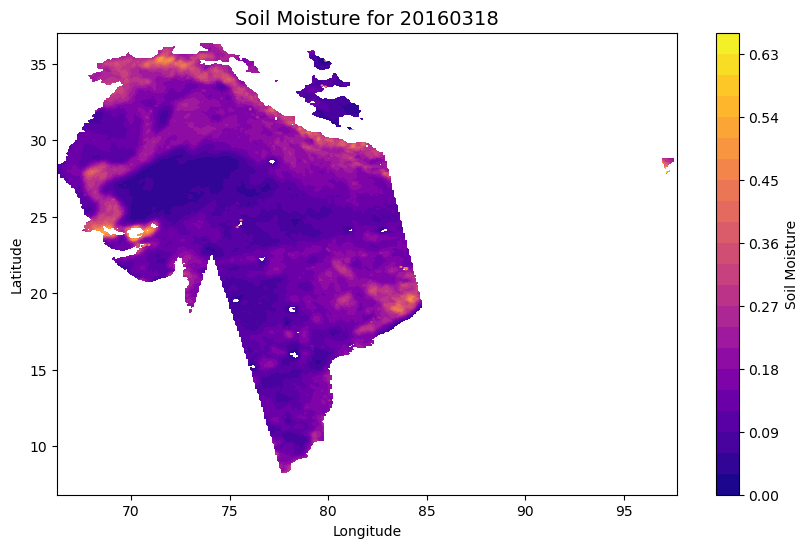

Plotting soil moisture for date: 20160319


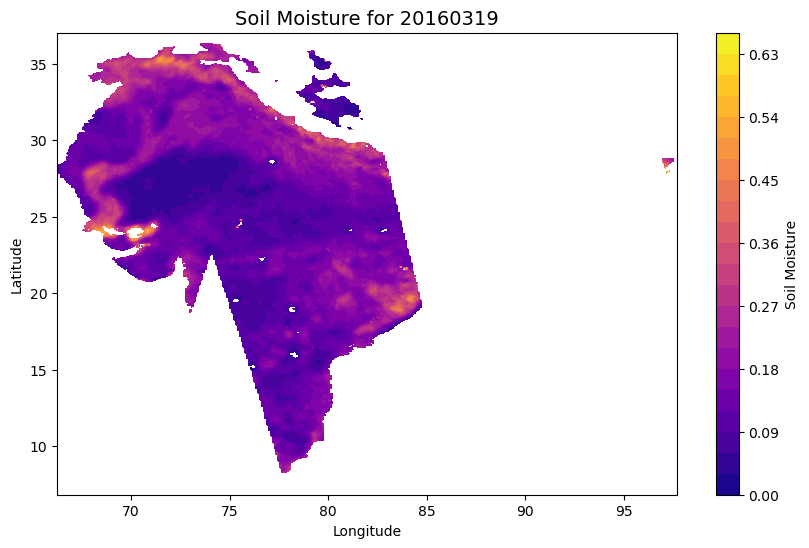

Plotting soil moisture for date: 20160320


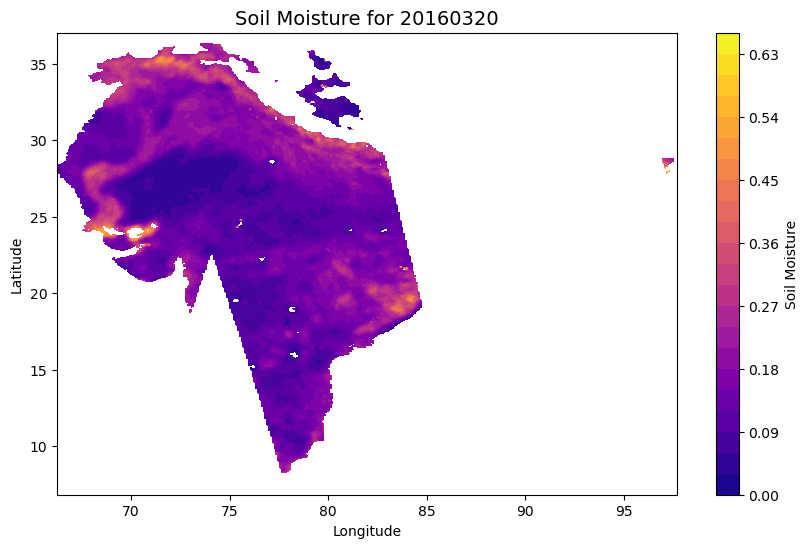

Plotting soil moisture for date: 20160321


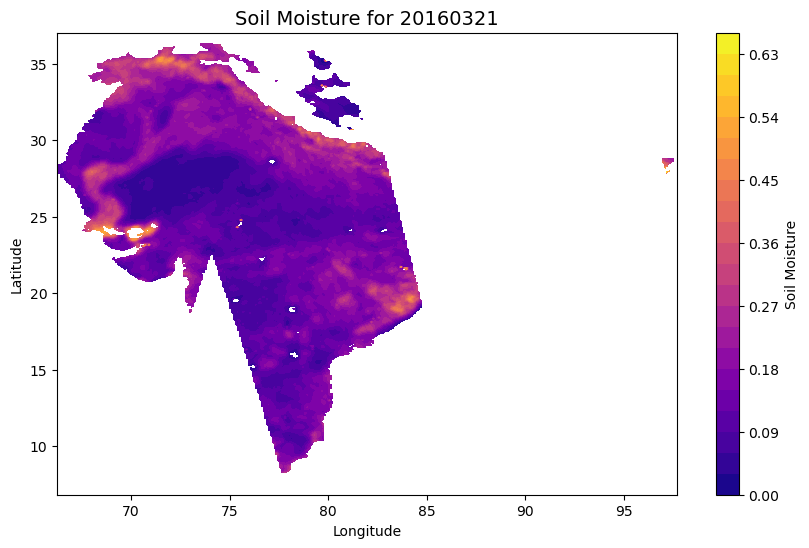

Plotting soil moisture for date: 20160322


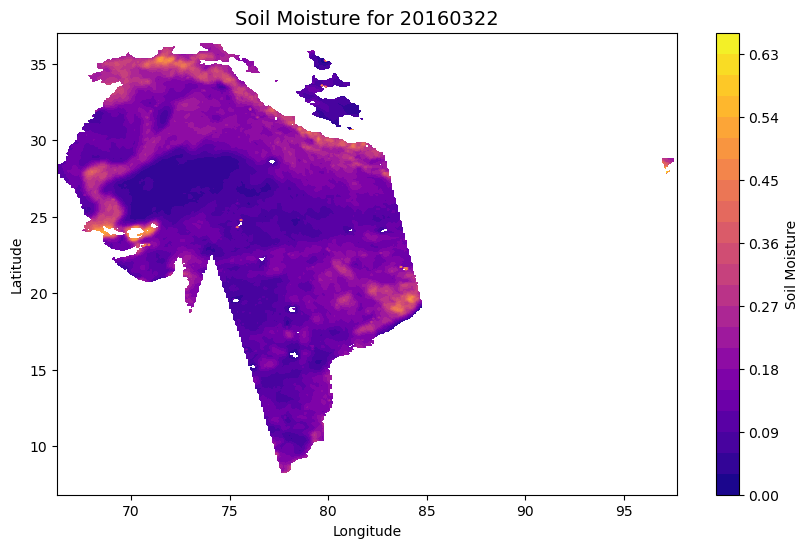

Plotting soil moisture for date: 20160323


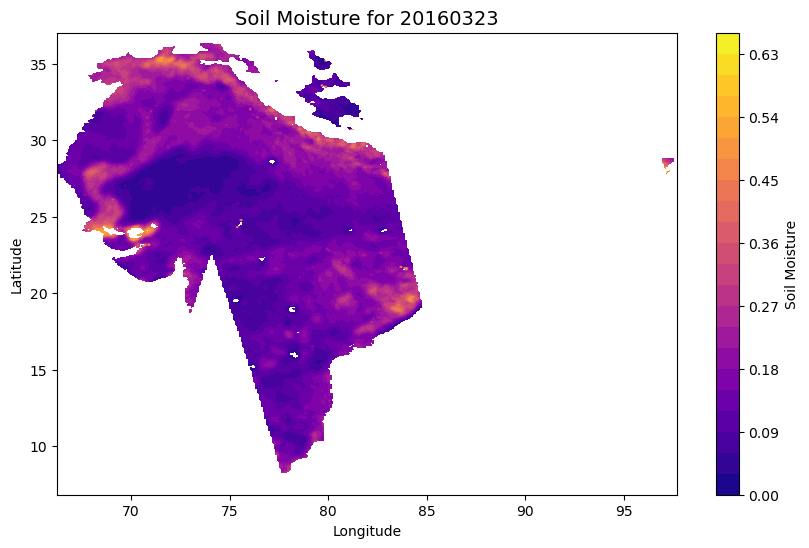

Plotting soil moisture for date: 20160324


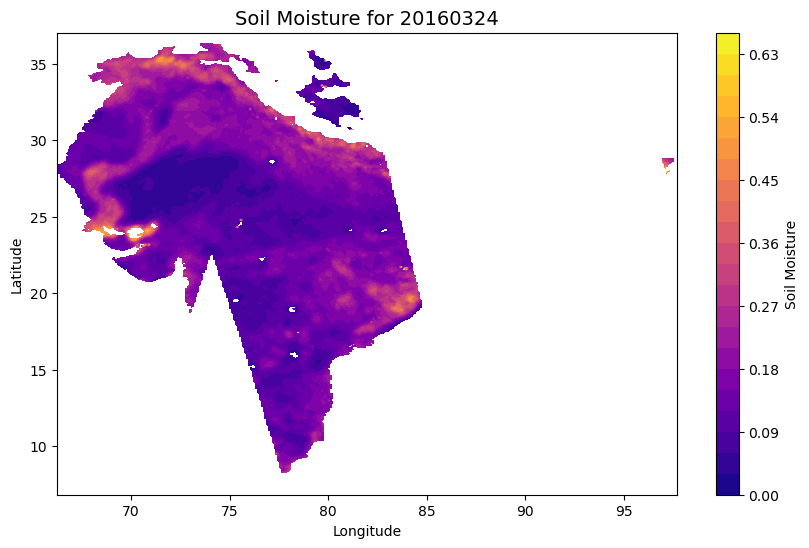

Plotting soil moisture for date: 20160325


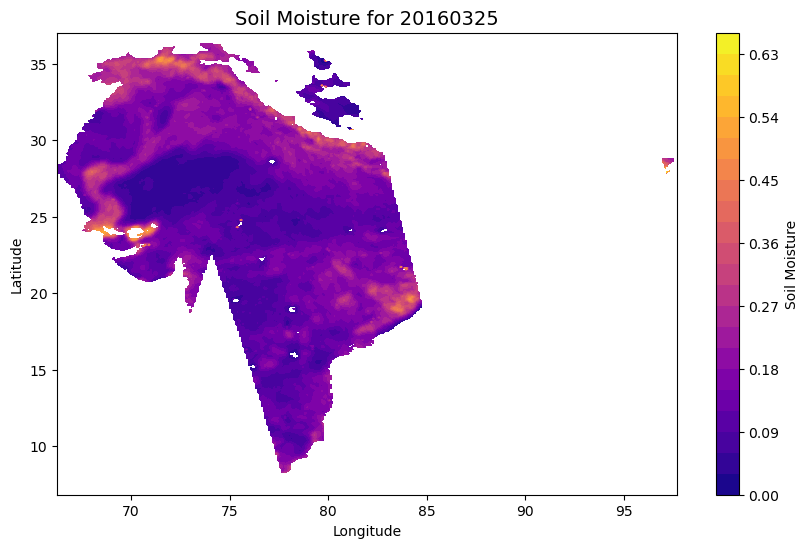

Plotting soil moisture for date: 20160326


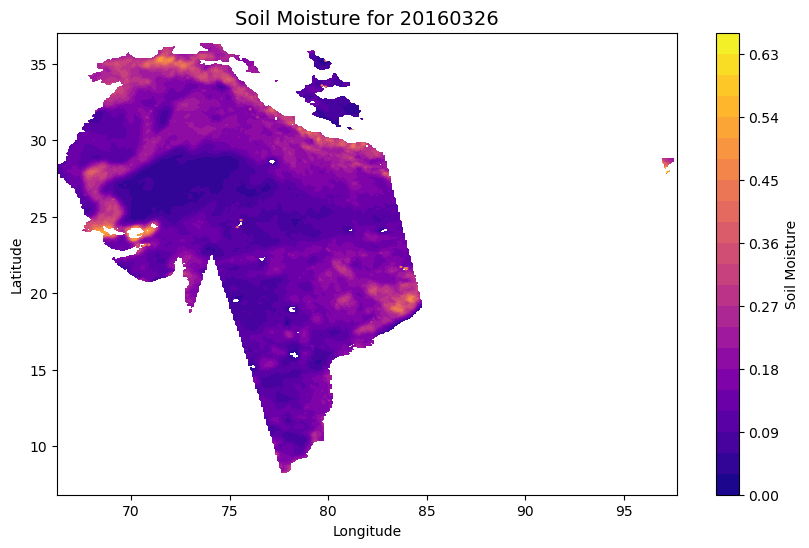

Plotting soil moisture for date: 20160327


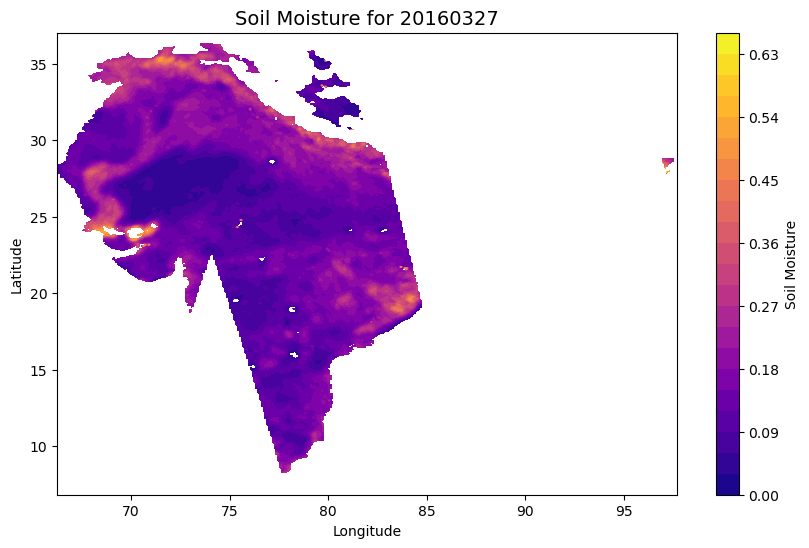

Plotting soil moisture for date: 20160328


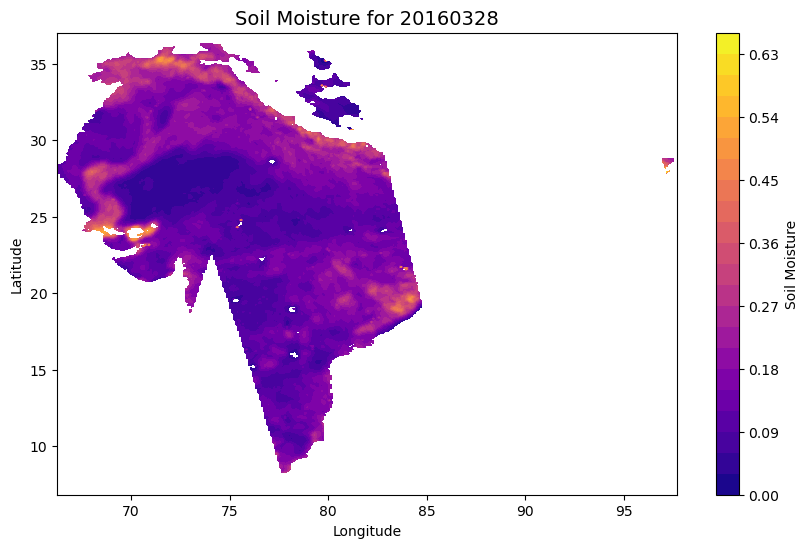

Plotting soil moisture for date: 20160329


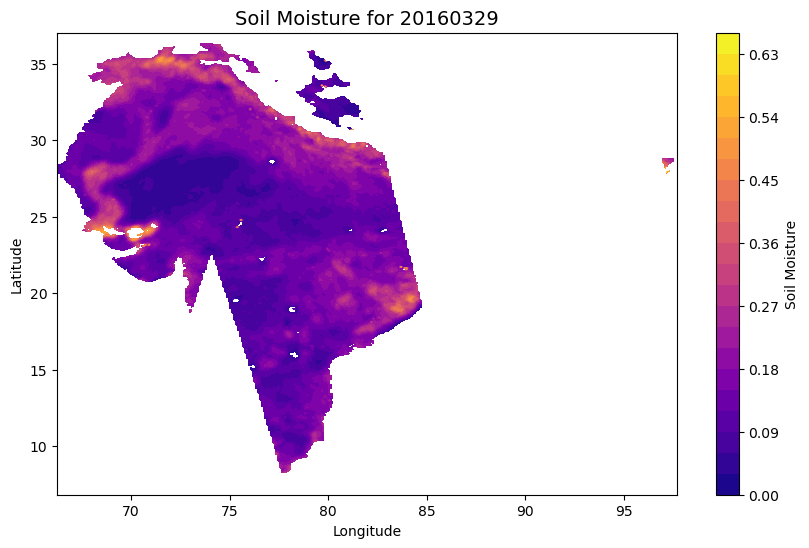

Plotting soil moisture for date: 20160330


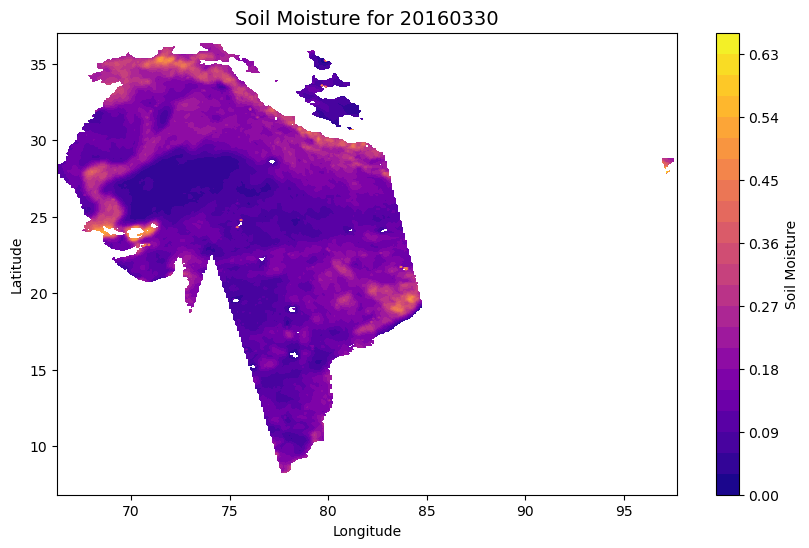

Plotting soil moisture for date: 20160331


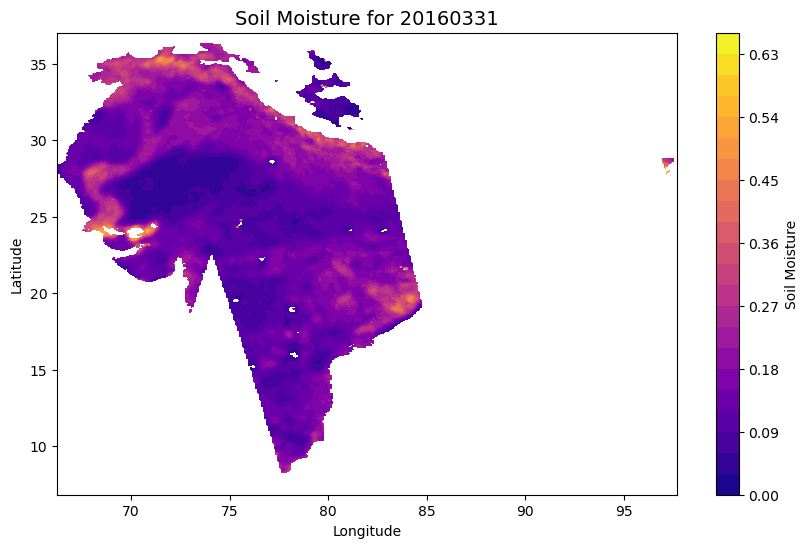

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Function to plot the soil moisture data for a specific date
def plot_soil_moisture(date_str, latitudes, longitudes, soil_moisture_values):
    # Create a meshgrid for the latitude and longitude values
    unique_lats = np.unique(latitudes)
    unique_lons = np.unique(longitudes)
    lon_grid, lat_grid = np.meshgrid(unique_lons, unique_lats)

    # Create a grid of soil moisture values
    soil_moisture_grid = np.full(lon_grid.shape, np.nan)

    # Map the soil moisture values to the corresponding grid points
    for lat, lon, sm in zip(latitudes, longitudes, soil_moisture_values):
        lat_idx = np.where(unique_lats == lat)[0][0]
        lon_idx = np.where(unique_lons == lon)[0][0]
        soil_moisture_grid[lat_idx, lon_idx] = sm

    # Plot the data using a colormap with more variation (e.g., 'plasma')
    plt.figure(figsize=(10, 6))
    plt.contourf(lon_grid, lat_grid, soil_moisture_grid, 20, cmap=cm.plasma)  # Using 'plasma' colormap
    plt.colorbar(label='Soil Moisture')
    plt.title(f"Soil Moisture for {date_str}", fontsize=14)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

# Loop through each date and plot the corresponding soil moisture data
for date_str, files in file_groups.items():
    print(f"Plotting soil moisture for date: {date_str}")

    # Read the averaged soil moisture data
    averaged_soil_moisture_df = pd.read_csv('20160331.csv')
    latitudes = averaged_soil_moisture_df['Latitude'].values
    longitudes = averaged_soil_moisture_df['Longitude'].values
    soil_moisture_values = averaged_soil_moisture_df['Average_Soil_Moisture'].values

    # Plot the soil moisture for this date
    plot_soil_moisture(date_str, latitudes, longitudes, soil_moisture_values)